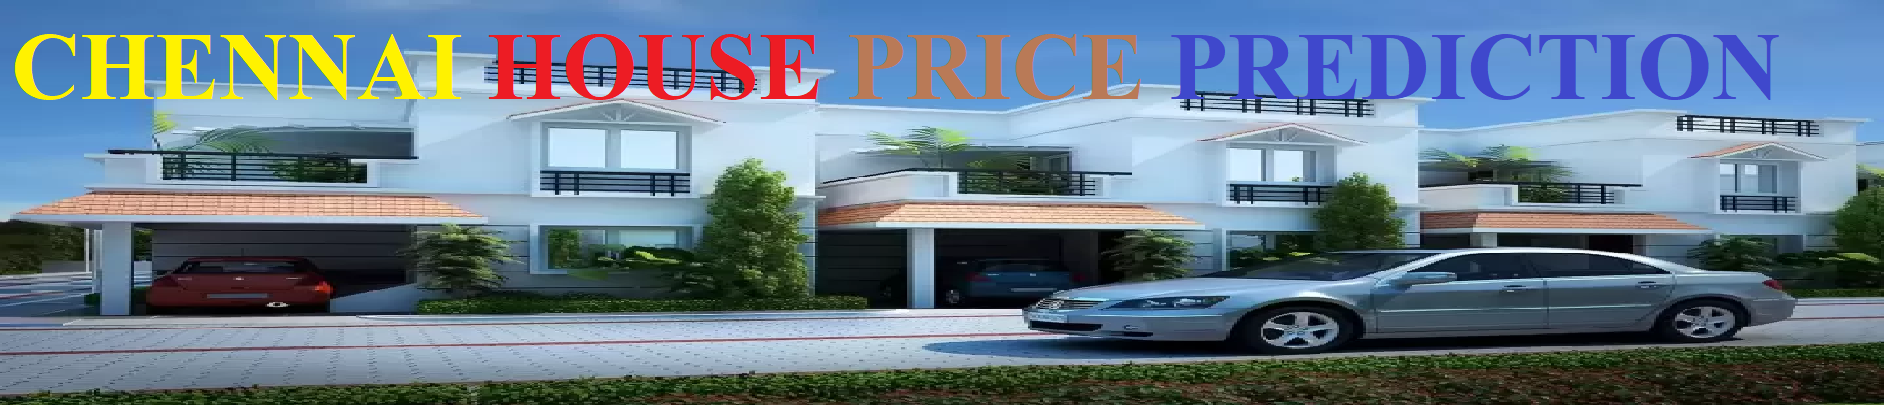

# **Name: Manikandan G**
# **Batch: D10**
# **Problem: Chennai House Price Predictions**

**Problem Statement**

(1) Real estate transactions are quite opaque sometimes and it may be difficult for a newbie to know the fair price of any given home. 

(2) Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it. 

(3) Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build homes that fetch them more money. 

(4) Chennai house sale price data is shared here and the participants are expected to build a sale price prediction model that will aid the customers to find a fair price for their homes and also help the sellers understand **what factors are fetching more money for the houses?**

**Given Data**

(1) The historical sale data is available here. The features of the house and the sale price are given in two different datasets - participants must merge them to do further analysis.

**Minimum Requirements**

(1) **It is not sufficient to just fit a model - the model must be analysed to find the important factors that contribute towards the price.**

(2) Also, it will be better to give a forecast range (range of permissible values) rather than a single estimate as it will help the customers to negotiate.


# **1. Importing the Necessary packages required**

In [1]:
import pandas as pd #To Handle DataFrames
import numpy as np  #To Handle calculation with array
import math #I have used ceil function in the code so have imported math library
from datetime import datetime #To Handle Date
from sklearn.model_selection import train_test_split #To Split the train and test for training
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt


# **2. CSV to DataFrame Conversion**

In [135]:
link_Dataset='https://raw.githubusercontent.com/Manikandan-professional/Datasets/main/train.csv'
link_Dataset_csv=pd.read_csv(link_Dataset)
df=pd.DataFrame(link_Dataset_csv)

# **3. Creating a Copy of DataFrame to df1 to make use later**

In [3]:
df1=df.copy()

# **3.1 Table Format of Null Values**

***This is a representation of Null values using the table format for easier view***

In [4]:
l1=[]
print('***********************************************')
print()
print('Name of the Column   |   Number of Null Values')
print()
for i in range(0,df.shape[1],1):
  if df[df.columns[i]].isnull().sum()>0: # Taking only the null values  
    l1.append(df.columns[i])
    print('***********************************************')
    print()
    print(df.columns[i],'                    ',df[df.columns[i]].isnull().sum())
    print()
print('***********************************************')

***********************************************

Name of the Column   |   Number of Null Values

***********************************************

N_BEDROOM                      1

***********************************************

N_BATHROOM                      5

***********************************************

QS_OVERALL                      48

***********************************************


# **3.2 Handling of Null Values**

***This particular block is used to make our decision about the Null values***

In [5]:
for i in range(0,len(l1),1):
  print('****************************************************************')
  print('Name of the Column is:                             ',l1[i])
  print('Number of Rows in',l1[i],'Column is:              ',df.shape[0])
  print('Number of Missing values in',l1[i],'Column is:      ',df[l1[i]].isnull().sum())
  print('Percentage of Missing values in',l1[i],'Column is: ',round((df[l1[i]].isnull().sum()/df.shape[0])*100,2))
print('*****************************************************************')

****************************************************************
Name of the Column is:                              N_BEDROOM
Number of Rows in N_BEDROOM Column is:               7109
Number of Missing values in N_BEDROOM Column is:       1
Percentage of Missing values in N_BEDROOM Column is:  0.01
****************************************************************
Name of the Column is:                              N_BATHROOM
Number of Rows in N_BATHROOM Column is:               7109
Number of Missing values in N_BATHROOM Column is:       5
Percentage of Missing values in N_BATHROOM Column is:  0.07
****************************************************************
Name of the Column is:                              QS_OVERALL
Number of Rows in QS_OVERALL Column is:               7109
Number of Missing values in QS_OVERALL Column is:       48
Percentage of Missing values in QS_OVERALL Column is:  0.68
*****************************************************************


# **3.3 Decision Execution - Null Values**

***1. Since there are 0.01% missing values in N_Bedroom this can be removed as we are going to loose only one row, for N_Bathroom there are 5 rows which has missing values with 0.07% missing from the rows this can also be removed. And finally QS_Overall has 0.68% missing data with 48 rows. Total of 0.74 missing values in the whole dataset and droping it will not make any difference in the dataset***

**Droping the Null values**



In [6]:
print('Number of Rows BEFORE droping the Null values rows: ',df.shape[0])
a=df.shape[0]
df=df.dropna(axis=0)
print('Number of Rows AFTER droping the Null values rows: ',df.shape[0])
b=df.shape[0]
print('Percentage of removed value is: ',100-((b/a)*100))
print('Percentage of Clean value is: ',(b/a)*100)


Number of Rows BEFORE droping the Null values rows:  7109
Number of Rows AFTER droping the Null values rows:  7056
Percentage of removed value is:  0.7455338303558818
Percentage of Clean value is:  99.25446616964412


In [7]:
df=df.reset_index()

# **4. Table Format of Column Names**

***The Below script gives us the column names available in the dataset given to us***

In [8]:
for i in range(0,df.shape[1],1):
  if i%2==0:
      print(i+1,'.',df.columns[i],' (',df.dtypes[df.columns[i]],') ',end="-------------------")
  else:
      print(i+1,'.',df.columns[i],' (',df.dtypes[df.columns[i]],') ')
      print()

1 . index  ( int64 ) -------------------2 . PRT_ID  ( object ) 

3 . AREA  ( object ) -------------------4 . INT_SQFT  ( int64 ) 

5 . DATE_SALE  ( object ) -------------------6 . DIST_MAINROAD  ( int64 ) 

7 . N_BEDROOM  ( float64 ) -------------------8 . N_BATHROOM  ( float64 ) 

9 . N_ROOM  ( int64 ) -------------------10 . SALE_COND  ( object ) 

11 . PARK_FACIL  ( object ) -------------------12 . DATE_BUILD  ( object ) 

13 . BUILDTYPE  ( object ) -------------------14 . UTILITY_AVAIL  ( object ) 

15 . STREET  ( object ) -------------------16 . MZZONE  ( object ) 

17 . QS_ROOMS  ( float64 ) -------------------18 . QS_BATHROOM  ( float64 ) 

19 . QS_BEDROOM  ( float64 ) -------------------20 . QS_OVERALL  ( float64 ) 

21 . REG_FEE  ( int64 ) -------------------22 . COMMIS  ( int64 ) 

23 . SALES_PRICE  ( int64 ) -------------------

# **5. Analysis of all Columns**

# **5.1 Analysis of PRT_ID**

In [9]:
df['PRT_ID'].value_counts() #Getting the unique values in the Column PRT_ID

P03210    1
P00597    1
P00780    1
P08706    1
P01458    1
         ..
P07061    1
P01516    1
P04254    1
P04550    1
P04325    1
Name: PRT_ID, Length: 7056, dtype: int64

In [10]:
print('The total number of rows in the dataset is',df.shape[0])

The total number of rows in the dataset is 7056


**5.1.1** **Since the Number of rows in the dataset is exactly equal to the** **PRT_ID column this clearly shows us that this a unique Items in the column.** **So we are removing it without any further analysis.**

In [11]:
df=df.drop(columns=['PRT_ID'],axis=1)
df.head()

,index,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


# **5.2 Analysis of AREA**

**5.2.1 Representation on list of unique areas which are available in the dataset**

In [12]:
list(df['AREA'].unique())

['Karapakkam',
 'Anna Nagar',
 'Adyar',
 'Velachery',
 'Chrompet',
 'KK Nagar',
 'TNagar',
 'T Nagar',
 'Chrompt',
 'Chrmpet',
 'Karapakam',
 'Ana Nagar',
 'Chormpet',
 'Adyr',
 'Velchery',
 'Ann Nagar',
 'KKNagar']

**5.2.1 In order to make our analysis more easier we are converting the Area Names into smaller case**

In [13]:
df.iloc[14:17,:]

,index,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
14,14,Velachery,1865,11-11-2010,157,3.0,2.0,5,Family,No,...,NoSewr,Paved,RM,4.8,2.2,4.9,3.66,619987,294494,15499680
15,16,Karapakkam,1639,04-11-2009,175,2.0,2.0,4,Normal Sale,Yes,...,ELO,Gravel,I,2.3,3.2,4.8,3.57,285648,77904,8656000
16,17,Chrompet,796,25-12-2011,134,1.0,1.0,2,AdjLand,Yes,...,AllPub,No Access,RL,3.5,4.6,4.7,4.30,316464,130951,10912550


In [14]:
for i in range(0,df.shape[0],1):
  df['AREA'][i]=df['AREA'][i].lower()

E:\Anaconda\envs\chpp\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


**5.2.2 Representation on list of unique areas which are available in the dataset after conversion of Area into Lower Case**

In [15]:
list(df['AREA'].unique())

['karapakkam',
 'anna nagar',
 'adyar',
 'velachery',
 'chrompet',
 'kk nagar',
 'tnagar',
 't nagar',
 'chrompt',
 'chrmpet',
 'karapakam',
 'ana nagar',
 'chormpet',
 'adyr',
 'velchery',
 'ann nagar',
 'kknagar']

**5.2.3 After the conversion on the list there is a important problem which needs to be addressed which is duplicates of the values with spelling error so we must merge them into for further analysis.**

**karapakkam = Merging of [karapakkam,karapakam]**

**tnagar = Merging of [tnagar,t nagar]**

**anna nagar = Merging of [anna nagar,ana nagar,ann nagar]**

**adyar = Merging of [adyar,adyr]**

**velachery = Merging of [velachery,velchery]**

**chrompet = Merging of [chrompet,chormpet,chrmpet,chrompt]**

**kk nagar = Merging of [kk nagar,kknagar]**

**5.2.4 Merging of Areas:**

In [16]:
for i in range(0,df.shape[0],1):
  if df['AREA'][i]=='karapakam':
    df['AREA'][i]='karapakkam'
  elif df['AREA'][i]=='ana nagar' or df['AREA'][i]=='ann nagar':
    df['AREA'][i]='anna nagar'
  elif df['AREA'][i]=='adyr':
    df['AREA'][i]='adyar'
  elif df['AREA'][i]=='velchery':
    df['AREA'][i]='velachery'
  elif df['AREA'][i]=='chormpet' or df['AREA'][i]=='chrmpet' or df['AREA'][i]=='chrompt':
    df['AREA'][i]='chrompet'
  elif df['AREA'][i]=='kknagar':
    df['AREA'][i]='kk nagar'
  elif df['AREA'][i]=='t nagar':
    df['AREA'][i]='tnagar'

E:\Anaconda\envs\chpp\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
E:\Anaconda\envs\chpp\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
E:\Anaconda\envs\chpp\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is s

In [17]:
print('The Number of Area split before cleaning is: ',len(df1['AREA'].value_counts()))
print('The Number of Area split before cleaning is: ',len(df['AREA'].value_counts()))

The Number of Area split before cleaning is:  17
The Number of Area split before cleaning is:  7


In [18]:
area=[]
number_of_properties=[]
for i in range(-1,-len(df['AREA'].value_counts())-1,-1):
  area.append(df['AREA'].value_counts().index[i])
  number_of_properties.append(df['AREA'].value_counts()[i])

**5.2.5 Pictorial Representation on Area vs Number of properties in the dataset**

**Correction 1: x_area,y_Noofproperties-->Representation of graph✓**

In [136]:
# plt.figure(figsize=(16,8),dpi=80)
# ax=plt.axes()
# ax.set_facecolor('black')
# y=[]
# for i in range(0,2500,200):
#   y.append(i)
# plt.bar(area,number_of_properties,color='white',width=0.02)
# plt.scatter(area,number_of_properties,color='red',s=80)
# plt.plot(area,number_of_properties,color='yellow')
# plt.title('Area vs Number of Properties',fontsize=25,color='blue')
# plt.xlabel("Name of the Area",fontsize=20,color='blue')
# plt.ylabel('Number of Properties in the dataset',fontsize=20,color='blue')
# plt.xticks(rotation=50,fontsize=20,color='blue')
# plt.yticks(y,fontsize=20,color='blue')
# plt.show()
# print()
# print('The below values are plotted in the graph')
# print()
# for i in range(0,len(area),1):
#   print('The number of properties listed in the dataset of area ',area[i],'is',number_of_properties[i])
#   print()




# **5.3 Analysis of INT_SQFT**

**5.3.1 Framing a seperate DataFrame with Area and INT_SQFT to take cummulative values i.e. (Sum of INT_SQFT of particular AREA wise division)**

In [20]:
df_int_sqft=pd.DataFrame({'AREA':df['AREA'],'INT_SQFT':df['INT_SQFT']})
df_int_sqft

,AREA,INT_SQFT
0,karapakkam,1004
1,anna nagar,1986
2,adyar,909
3,velachery,1855
4,karapakkam,1226
...,...,...
7051,karapakkam,787
7052,velachery,1896
7053,tnagar,1973
7054,chrompet,1023


**5.3.2 Creating a separate list of m1,m2,m3 of minimum,maximum,Mean values**

In [21]:
m1=[]#Minimum INT_SQFT of the particular AREA
m2=[]#Maximum INT_SQFT of the particular AREA
m3=[]#Mean INT_SQFT of the particular AREA
for i in range(0,len(area),1):
  m1.append(df_int_sqft[df_int_sqft['AREA']==area[i]]['INT_SQFT'].min())
  m2.append(df_int_sqft[df_int_sqft['AREA']==area[i]]['INT_SQFT'].max())
  m3.append(df_int_sqft[df_int_sqft['AREA']==area[i]]['INT_SQFT'].mean())

**5.3.3 Pictorial Representation on Area vs INT_SQFT[Minimum,Mean,Maximum] in the dataset**

In [137]:
# plt.figure(figsize=(16,8),dpi=80)
# ax=plt.axes()
# ax.set_facecolor('black')
# #-------------
# plt.bar(area,m1,color='red',width=0.3)          #Minimum Value Spread
# plt.scatter(area,m1,color='red',s=80)
# plt.plot(area,m1,color='red')
# #-------------
# plt.bar(area,m3,color='green',width=0.15)        #Mean Value Spread
# plt.scatter(area,m3,color='red',s=80)
# plt.plot(area,m3,color='green')
# #-------------
# plt.bar(area,m2,color='white',width=0.04)         #Maximum Value Spread
# plt.scatter(area,m2,color='red',s=80)
# plt.plot(area,m2,color='white')
# #-------------
# plt.title('Area vs [Minimum,Mean,Maximum] INT_SQFT of that particular Area',fontsize=25,color='blue')
# plt.xlabel("Name of the Area",fontsize=20,color='blue')
# plt.ylabel('[Minimum,Mean,Maximum] INT_SQFT of the Area',fontsize=20,color='blue')
# plt.xticks(rotation=50,fontsize=20,color='blue')
# plt.yticks(fontsize=20,color='blue')
# plt.show()
# print('Data which is plotted is represented below for the reference:\n',)
# combined_df=pd.DataFrame({'Area':area,'Minimum INT_SQFT':m1,'Average INT_SQFT':m2,'Maximum INT_SQFT':m3})
# combined_df

**-->From the above pictorial representation it is clear that KK Nagar land price is the highest and Cheapest Land is Karapakkam**

# **5.4 Analysis of DATE_SALE and DATE_BUILD**

In [23]:
year_sold=[]

year_build=[]
for i in range(0,df.shape[0],1):
  df['DATE_SALE'][i] = datetime.strptime(str(df['DATE_SALE'][i]),'%d-%m-%Y')
  
  df['DATE_BUILD'][i] = datetime.strptime(df['DATE_BUILD'][i], '%d-%m-%Y')
  year_sold.append(df['DATE_SALE'][i].year)
  year_build.append(df['DATE_BUILD'][i].year)

E:\Anaconda\envs\chpp\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
E:\Anaconda\envs\chpp\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


# **5.4.1 Finding out the Number of years between [House Build - House Sold]**

In [24]:
df['year_sold']=year_sold
df['year_build']=year_build
df['Year_difference']=df['year_sold']-df['year_build']

# **5.4.2 Finding out the [Average,Oldest Building,Latest Building]**

In [25]:

d1_avg_year_difference=[]
d2_oldestBuilding_year_difference=[]
d3_NewestBuilding_year_difference=[]
for i in range(0,len(area),1):
  d1_avg_year_difference.append(df[df['AREA']==area[i]]['Year_difference'].mean())
  d2_oldestBuilding_year_difference.append(df[df['AREA']==area[i]]['Year_difference'].max())
  d3_NewestBuilding_year_difference.append(df[df['AREA']==area[i]]['Year_difference'].min())
  print('***********************************************************************')
  print('The Average Age of the building in',area[i],'is',math.ceil(d1_avg_year_difference[i]),'years old.')
  print('The Oldest Age building in',area[i],'is',df[df['AREA']==area[i]]['Year_difference'].max(),'years old.')
  print('The Newest Age building in',area[i],'is',df[df['AREA']==area[i]]['Year_difference'].min(),'years old.')

***********************************************************************
The Average Age of the building in tnagar is 26 years old.
The Oldest Age building in tnagar is 45 years old.
The Newest Age building in tnagar is 4 years old.
***********************************************************************
The Average Age of the building in adyar is 23 years old.
The Oldest Age building in adyar is 40 years old.
The Newest Age building in adyar is 5 years old.
***********************************************************************
The Average Age of the building in anna nagar is 26 years old.
The Oldest Age building in anna nagar is 45 years old.
The Newest Age building in anna nagar is 5 years old.
***********************************************************************
The Average Age of the building in velachery is 31 years old.
The Oldest Age building in velachery is 55 years old.
The Newest Age building in velachery is 5 years old.
******************************************************

**1. The Average age of buildings in KK Nagar is 18 years which indicates us that there are many House of not very old buildings**

**2. In Comparison the Average age of buildings in Velachery is 31 years which indicates us there are many Houses of very old buildings**

**5.4.3 Pictorial Representation on Year Difference Between build and sold**

In [138]:
# print()
# print('                                             Presentation on pictorial format represented as:')
# print()
# plt.figure(figsize=(16,8),dpi=80)
# ax=plt.axes()
# ax.set_facecolor('black')
# y=[]
# for i in range(0,50,5):
#   y.append(i)
# plt.scatter(area,d1_avg_year_difference,color='red',s=100)
# plt.plot(area,d1_avg_year_difference,color='white')
# plt.title('Area vs Number of Year Difference between [build and sold]',color='blue',fontsize=25)
# plt.xlabel('Area',color='blue',fontsize=20)
# plt.ylabel('Number of Year Difference year[build-sold]',color='blue',fontsize=20)
# plt.xticks(rotation=50,fontsize=20,color='blue')
# plt.yticks(y,fontsize=20,color='blue')
# plt.show()

In [139]:
ddf=pd.DataFrame({'Area':area,'Year_Difference':d1_avg_year_difference})
# plt.figure(figsize=(16,8),dpi=80)
# ax=plt.axes()
# ax.set_facecolor('black')
# y=[]
# for i in range(0,65,3):
#   y.append(i)
# print('1. Red Line Indicates the Average age of oldest Buildings in the particular Area\n2. White Line indicates Average age difference of the buildings in the particular area\n3. Green Line indicates the New buildings on that particular area')
# plt.title('Three Categories Representation [Minimum|Average|Maximum] Buildings Age',color='blue',fontsize=25)
# plt.xlabel('Name of the Area',color='blue',fontsize=20)
# plt.ylabel('[Minimum|Average|Maximum] Buildings Age',color='blue',fontsize=20)
# plt.xticks(rotation=50,color='blue',fontsize=20)
# plt.yticks(y,color='blue',fontsize=20)
# plt.scatter(ddf['Area'],ddf['Year_Difference'],s=100,color='white')
# plt.plot(ddf['Area'],ddf['Year_Difference'],color='white')
# plt.scatter(ddf['Area'],d2_oldestBuilding_year_difference,s=50,color='red')
# plt.plot(ddf['Area'],d2_oldestBuilding_year_difference,color='red')
# plt.scatter(ddf['Area'],d3_NewestBuilding_year_difference,s=50,color='limegreen')
# plt.plot(ddf['Area'],d3_NewestBuilding_year_difference,color='limegreen')
# plt.show()

**As the above diagram shows no linear patterns but, Year Difference might be** 
**a important feature to be considered because**


**(i) the less number of years higher the price**


**(ii)larger the number of years lesser the price**

# **5.5 Analysis of DIST_MAINROAD**

In [28]:
df_DIST_MAINROAD=df[['AREA','DIST_MAINROAD']]
df_DIST_MAINROAD

,AREA,DIST_MAINROAD
0,karapakkam,131
1,anna nagar,26
2,adyar,70
3,velachery,14
4,karapakkam,84
...,...,...
7051,karapakkam,40
7052,velachery,156
7053,tnagar,63
7054,chrompet,44


In [29]:
average_Distance=[]
for i in range(0,len(area),1):
  print('The Sum Distance from the Main Road to the house building in',area[i],'is',df_DIST_MAINROAD[df_DIST_MAINROAD['AREA']==area[i]]['DIST_MAINROAD'].sum())
  print('The Average Distance from the Main Road to the house building in',area[i],'is',round(df_DIST_MAINROAD[df_DIST_MAINROAD['AREA']==area[i]]['DIST_MAINROAD'].sum()/np.shape(df_DIST_MAINROAD[df_DIST_MAINROAD['AREA']==area[i]])[0],2))
  average_Distance.append(round(df_DIST_MAINROAD[df_DIST_MAINROAD['AREA']==area[i]]['DIST_MAINROAD'].sum()/np.shape(df_DIST_MAINROAD[df_DIST_MAINROAD['AREA']==area[i]])[0],2))
  print()

The Sum Distance from the Main Road to the house building in tnagar is 51283
The Average Distance from the Main Road to the house building in tnagar is 103.6

The Sum Distance from the Main Road to the house building in adyar is 77996
The Average Distance from the Main Road to the house building in adyar is 101.43

The Sum Distance from the Main Road to the house building in anna nagar is 78008
The Average Distance from the Main Road to the house building in anna nagar is 100.4

The Sum Distance from the Main Road to the house building in velachery is 92365
The Average Distance from the Main Road to the house building in velachery is 94.73

The Sum Distance from the Main Road to the house building in kk nagar is 99736
The Average Distance from the Main Road to the house building in kk nagar is 100.74

The Sum Distance from the Main Road to the house building in karapakkam is 137321
The Average Distance from the Main Road to the house building in karapakkam is 101.05

The Sum Distance f

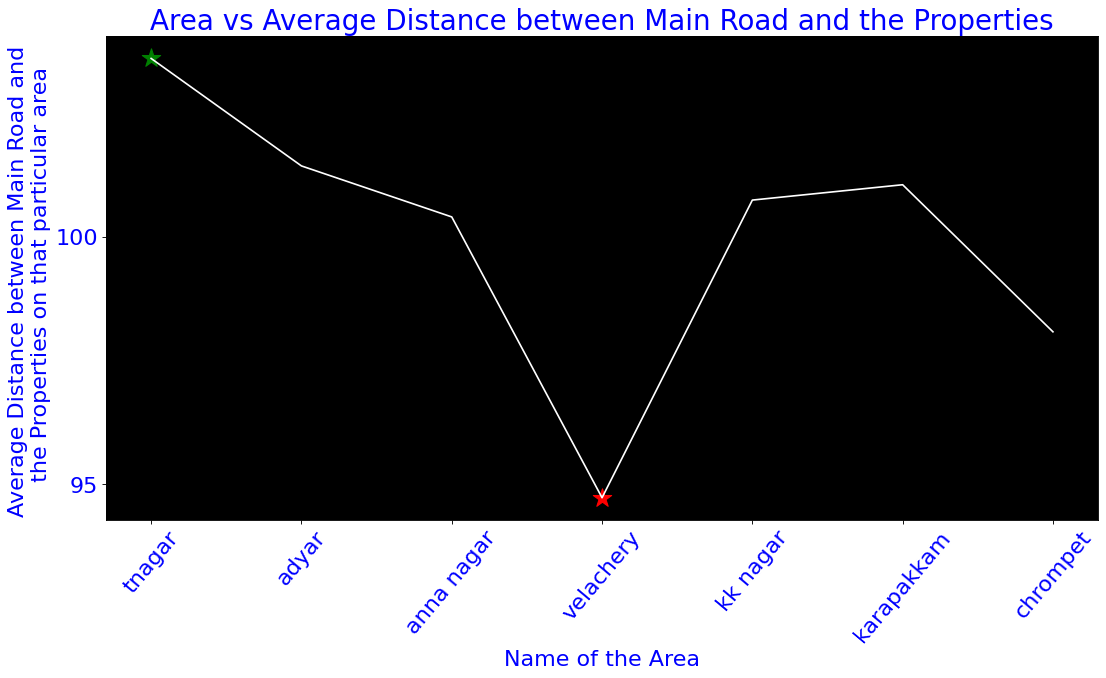

Green marking represents the highest value(distance from home to the main road is far away) 
red represents the lowest value which means (distance from home to the main road is not far away)

The Minimum distance house from Mainroad in  tnagar is: 0
The Maximum distance house from Mainroad in  tnagar is: 200
An Average distance house from Mainroad in  tnagar is: 103.6
*********
The Minimum distance house from Mainroad in  adyar is: 0
The Maximum distance house from Mainroad in  adyar is: 200
An Average distance house from Mainroad in  adyar is: 101.43
*********
The Minimum distance house from Mainroad in  anna nagar is: 0
The Maximum distance house from Mainroad in  anna nagar is: 200
An Average distance house from Mainroad in  anna nagar is: 100.4
*********
The Minimum distance house from Mainroad in  velachery is: 0
The Maximum distance house from Mainroad in  velachery is: 200
An Average distance house from Mainroad in  velachery is: 94.73
*********
The Minimum distance house from M

In [30]:
y=[]
for i in range(0,150,5):
  y.append(i)

plt.figure(figsize=(16,8),dpi=80)
ax=plt.axes()
ax.set_facecolor('black')
plt.title('Area vs Average Distance between Main Road and the Properties',color='blue',fontsize=25)
plt.xlabel('Name of the Area',color='blue',fontsize=20)
plt.ylabel('Average Distance between Main Road and \n the Properties on that particular area',color='blue',fontsize=20)
plt.xticks(rotation=50,color='blue',fontsize=20)
plt.yticks(y,color='blue',fontsize=20)
#plt.bar(area,average_Distance,color='white',width=0.01)
plt.plot(area,average_Distance,color='white')
plt.scatter(area[0],average_Distance[0],color='green',marker='*',s=300)
plt.scatter(area[3],average_Distance[3],color='red',marker='*',s=300)
plt.show()
print('Green marking represents the highest value(distance from home to the main road is far away) \nred represents the lowest value which means (distance from home to the main road is not far away)')
print()
for i in range(0,len(area),1):
  print('The Minimum distance house from Mainroad in ',area[i],'is:',df[df['AREA']==area[i]]['DIST_MAINROAD'].min())
  print('The Maximum distance house from Mainroad in ',area[i],'is:',df[df['AREA']==area[i]]['DIST_MAINROAD'].max())
  print('An Average distance house from Mainroad in ',area[i],'is:',round(df[df['AREA']==area[i]]['DIST_MAINROAD'].mean(),2))
  print('*********')


**1. From the above representation it is clear that Higher the value higher the time taken to travel from home to the mainroad of that particular area**

**2. Velachery has the least average value of 94.84 which clearly says that the properties situated in are close to the mainroad**

# **5.6 Analysis of N_BEDROOM**

In [31]:
df_N_BEDROOM=df[['AREA','N_BEDROOM']]
df_N_BEDROOM
average_N_BEDROOM=[]
for i in range(0,len(area),1):
  print('The Sum of Number of Bedroom in',area[i],'is',df_N_BEDROOM[df_N_BEDROOM['AREA']==area[i]]['N_BEDROOM'].sum())
  print('The Average Number of Bedroom in',area[i],'is',round(df_N_BEDROOM[df_N_BEDROOM['AREA']==area[i]]['N_BEDROOM'].sum()/np.shape(df_N_BEDROOM[df_N_BEDROOM['AREA']==area[i]])[0],2))
  print('The minimum number of Bedrrom in',area[i],'is',df[df['AREA']==area[i]]['N_ROOM'].min())
  print('The maximum number of Bedrrom in',area[i],'is',df[df['AREA']==area[i]]['N_ROOM'].max())
  average_N_BEDROOM.append(round(df_N_BEDROOM[df_N_BEDROOM['AREA']==area[i]]['N_BEDROOM'].sum()/np.shape(df_N_BEDROOM[df_N_BEDROOM['AREA']==area[i]])[0],2))
  print()

The Sum of Number of Bedroom in tnagar is 718.0
The Average Number of Bedroom in tnagar is 1.45
The minimum number of Bedrrom in tnagar is 4
The maximum number of Bedrrom in tnagar is 5

The Sum of Number of Bedroom in adyar is 899.0
The Average Number of Bedroom in adyar is 1.17
The minimum number of Bedrrom in adyar is 2
The maximum number of Bedrrom in adyar is 4

The Sum of Number of Bedroom in anna nagar is 1084.0
The Average Number of Bedroom in anna nagar is 1.4
The minimum number of Bedrrom in anna nagar is 4
The maximum number of Bedrrom in anna nagar is 5

The Sum of Number of Bedroom in velachery is 2315.0
The Average Number of Bedroom in velachery is 2.37
The minimum number of Bedrrom in velachery is 4
The maximum number of Bedrrom in velachery is 5

The Sum of Number of Bedroom in kk nagar is 2785.0
The Average Number of Bedroom in kk nagar is 2.81
The minimum number of Bedrrom in kk nagar is 3
The maximum number of Bedrrom in kk nagar is 6

The Sum of Number of Bedroom in

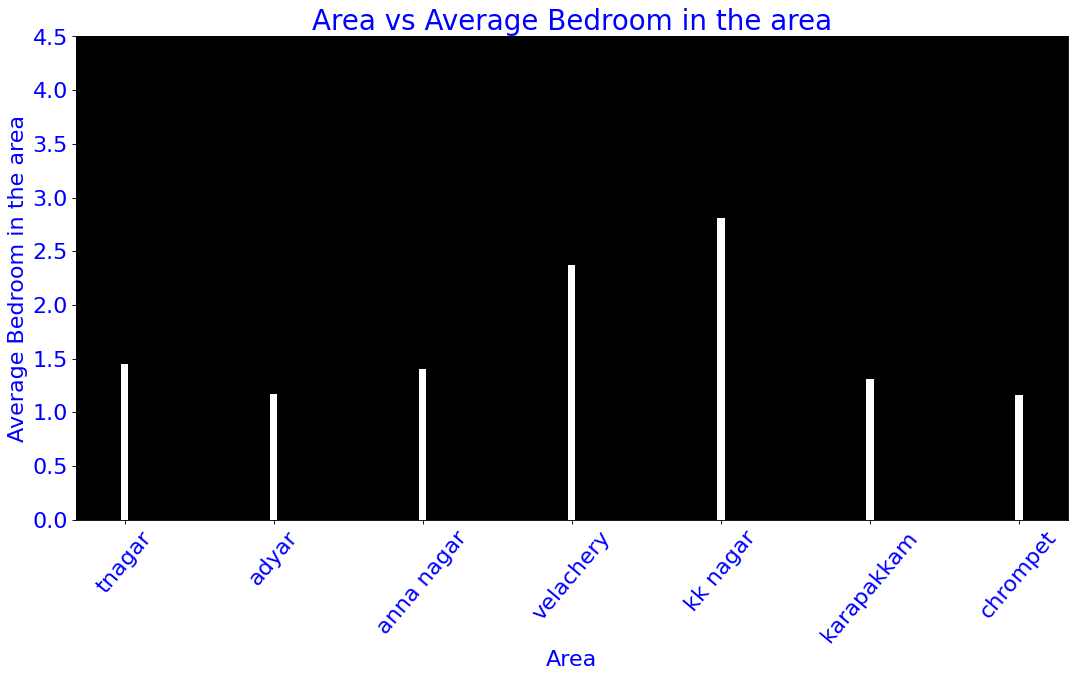

,Area,Average Bedroom in the area
0,tnagar,1.45
1,adyar,1.17
2,anna nagar,1.40
3,velachery,2.37
4,kk nagar,2.81
5,karapakkam,1.31
6,chrompet,1.16


In [32]:
y=[]
for i in range(0,10,1):
  y.append(i/2)
plt.figure(figsize=(16,8),dpi=80)
ax=plt.axes()
ax.set_facecolor('black')
plt.bar(area,average_N_BEDROOM,width=0.05,color='white')

plt.title('Area vs Average Bedroom in the area',color='blue',fontsize=25)
plt.xlabel('Area',color='blue',fontsize=20)
plt.ylabel('Average Bedroom in the area',color='blue',fontsize=20)
plt.xticks(rotation=50,color='blue',fontsize=20)
plt.yticks(y,color='blue',fontsize=20)

df_average_N_BEDROOM=pd.DataFrame({'Area':area,'Average Bedroom in the area':average_N_BEDROOM})
plt.show()
df_average_N_BEDROOM

**1. From the above representation it is clear that KK Nagar has highest number of Bedrooms while the houses are build.**

**2.The least number of Bedrooms in adyar and chrompet indicates us that there are houses build with less number of bedrooms basically 1**

# **5.7 Analysis of N_BATHROOM**

In [33]:
df_N_BATHROOM=df[['AREA','N_BATHROOM']]
df_N_BATHROOM
average_N_BATHROOM=[]
for i in range(0,len(area),1):
  print('The Sum of Number of Bathroom in',area[i],'is',df_N_BATHROOM[df_N_BATHROOM['AREA']==area[i]]['N_BATHROOM'].sum())
  print('The Average Number of Bathroom in',area[i],'is',round(df_N_BATHROOM[df_N_BATHROOM['AREA']==area[i]]['N_BATHROOM'].sum()/np.shape(df_N_BATHROOM[df_N_BATHROOM['AREA']==area[i]])[0],2))
  average_N_BATHROOM.append(round(df_N_BATHROOM[df_N_BATHROOM['AREA']==area[i]]['N_BATHROOM'].sum()/np.shape(df_N_BATHROOM[df_N_BATHROOM['AREA']==area[i]])[0],2))
  print()

The Sum of Number of Bathroom in tnagar is 495.0
The Average Number of Bathroom in tnagar is 1.0

The Sum of Number of Bathroom in adyar is 899.0
The Average Number of Bathroom in adyar is 1.17

The Sum of Number of Bathroom in anna nagar is 777.0
The Average Number of Bathroom in anna nagar is 1.0

The Sum of Number of Bathroom in velachery is 1340.0
The Average Number of Bathroom in velachery is 1.37

The Sum of Number of Bathroom in kk nagar is 1581.0
The Average Number of Bathroom in kk nagar is 1.6

The Sum of Number of Bathroom in karapakkam is 1777.0
The Average Number of Bathroom in karapakkam is 1.31

The Sum of Number of Bathroom in chrompet is 1691.0
The Average Number of Bathroom in chrompet is 1.0



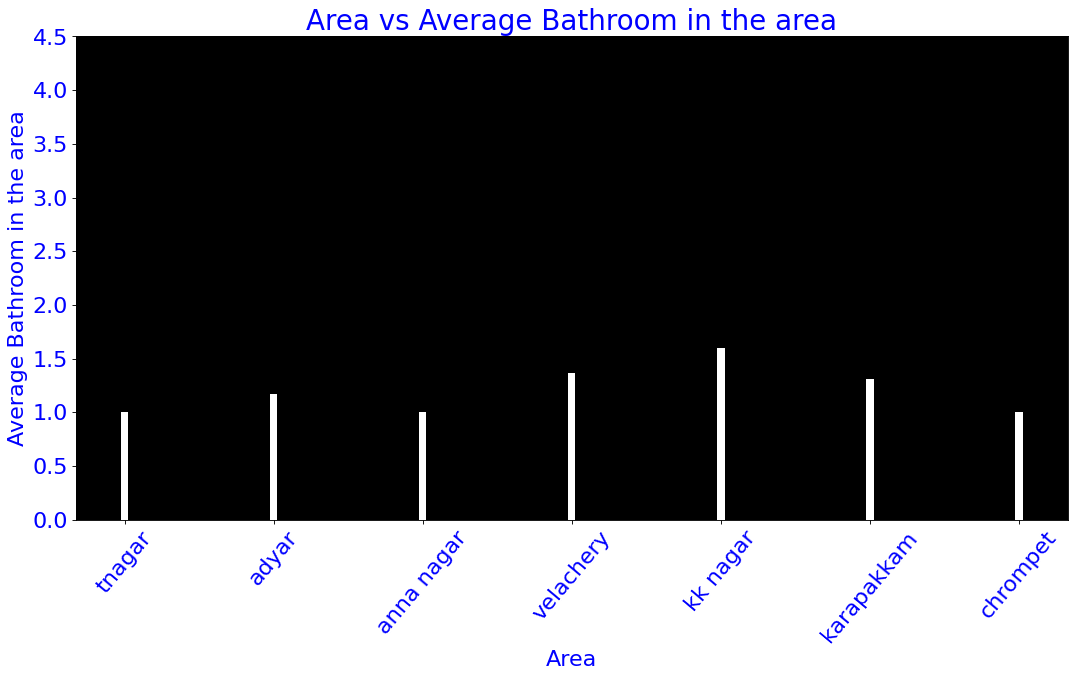

,Area,Average Bathroom in the area
0,tnagar,1.00
1,adyar,1.17
2,anna nagar,1.00
3,velachery,1.37
4,kk nagar,1.60
5,karapakkam,1.31
6,chrompet,1.00


In [34]:
y=[]
for i in range(0,10,1):
  y.append(i/2)
plt.figure(figsize=(16,8),dpi=80)
ax=plt.axes()
ax.set_facecolor('black')
plt.bar(area,average_N_BATHROOM,width=0.05,color='white')

plt.title('Area vs Average Bathroom in the area',color='blue',fontsize=25)
plt.xlabel('Area',color='blue',fontsize=20)
plt.ylabel('Average Bathroom in the area',color='blue',fontsize=20)
plt.xticks(rotation=50,color='blue',fontsize=20)
plt.yticks(y,color='blue',fontsize=20)

average_N_BATHROOM=pd.DataFrame({'Area':area,'Average Bathroom in the area':average_N_BATHROOM})
plt.show()
average_N_BATHROOM

**1. From the above representation it is clear that atleast there are one bathroom are there in every house in every area**

**2. On comparison KK Nagar, Velachery, Karapakkam might have more than 2 bathroom build in most of the houses**

# **5.8 Analysis of N_ROOM**

In [35]:
df_N_ROOM=df[['AREA','N_ROOM']]
df_N_ROOM
average_N_Room=[]
for i in range(0,len(area),1):
  print('The Sum of Number of Room in',area[i],'is',df_N_ROOM[df_N_ROOM['AREA']==area[i]]['N_ROOM'].sum())
  print('The Average Number of Room in',area[i],'is',round(df_N_ROOM[df_N_ROOM['AREA']==area[i]]['N_ROOM'].sum()/np.shape(df_N_ROOM[df_N_ROOM['AREA']==area[i]])[0],2))
  average_N_Room.append(round(df_N_ROOM[df_N_ROOM['AREA']==area[i]]['N_ROOM'].sum()/np.shape(df_N_ROOM[df_N_ROOM['AREA']==area[i]])[0],2))
  print()

The Sum of Number of Room in tnagar is 2203
The Average Number of Room in tnagar is 4.45

The Sum of Number of Room in adyar is 2225
The Average Number of Room in adyar is 2.89

The Sum of Number of Room in anna nagar is 3415
The Average Number of Room in anna nagar is 4.4

The Sum of Number of Room in velachery is 4265
The Average Number of Room in velachery is 4.37

The Sum of Number of Room in kk nagar is 4765
The Average Number of Room in kk nagar is 4.81

The Sum of Number of Room in karapakkam is 4064
The Average Number of Room in karapakkam is 2.99

The Sum of Number of Room in chrompet is 5076
The Average Number of Room in chrompet is 3.0



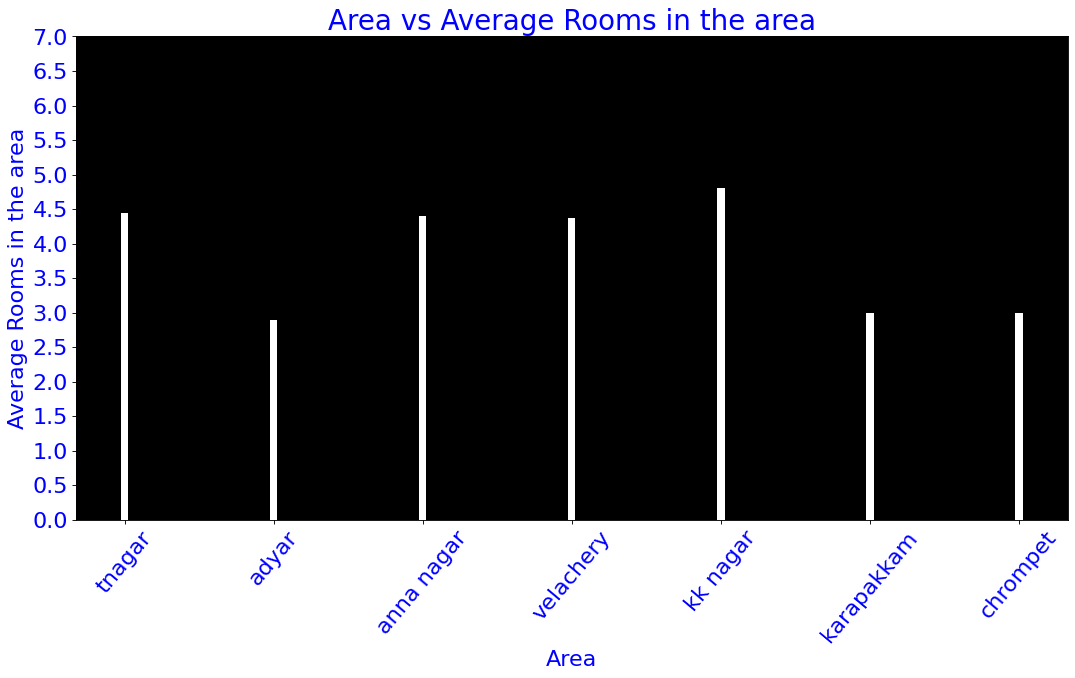

,Area,Average Rooms in the area
0,tnagar,4.45
1,adyar,2.89
2,anna nagar,4.40
3,velachery,4.37
4,kk nagar,4.81
5,karapakkam,2.99
6,chrompet,3.00


In [36]:
y=[]
for i in range(0,15,1):
  y.append(i/2)
plt.figure(figsize=(16,8),dpi=80)
ax=plt.axes()
ax.set_facecolor('black')
plt.bar(area,average_N_Room,width=0.05,color='white')

plt.title('Area vs Average Rooms in the area',color='blue',fontsize=25)
plt.xlabel('Area',color='blue',fontsize=20)
plt.ylabel('Average Rooms in the area',color='blue',fontsize=20)
plt.xticks(rotation=50,color='blue',fontsize=20)
plt.yticks(y,color='blue',fontsize=20)

average_N_Room=pd.DataFrame({'Area':area,'Average Rooms in the area':average_N_Room})
plt.show()
average_N_Room

**1. Tnagar, Annanagar and Velachery areas have the highest average number of rooms indicates that the houses are build with many number of rooms.**

**2. On Comparison Adayar and Karapakkam houses have less average value indicates that the houses are build with less number of rooms.**

# **5.9 Analysis of SALE_COND**

In [37]:
for i in range(0,df.shape[0],1):
  df['SALE_COND'][i]=df['SALE_COND'][i].lower()

E:\Anaconda\envs\chpp\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [38]:
df_SALE_COND=df[['AREA','SALE_COND']]
df_SALE_COND

,AREA,SALE_COND
0,karapakkam,abnormal
1,anna nagar,abnormal
2,adyar,abnormal
3,velachery,family
4,karapakkam,abnormal
...,...,...
7051,karapakkam,partial
7052,velachery,partial
7053,tnagar,family
7054,chrompet,partial


In [39]:
df_SALE_COND['SALE_COND'].unique()

array(['abnormal', 'family', 'partial', 'adjland', 'normal sale',
       'ab normal', 'partiall', 'adj land'], dtype=object)

In [40]:
df_SALE_COND=df_SALE_COND.reset_index()
for i in range(0,df_SALE_COND.shape[0],1):
  if df_SALE_COND['SALE_COND'][i]=='ab normal' or df_SALE_COND['SALE_COND'][i]=='abnormal':
    df_SALE_COND['SALE_COND'][i]='abnormal'
    df['SALE_COND'][i]='abnormal'
  elif df_SALE_COND['SALE_COND'][i]=='partiaLl' or df_SALE_COND['SALE_COND'][i]=='partiall' or  df_SALE_COND['SALE_COND'][i]=='partial':
    df['SALE_COND'][i]='partial'
    df_SALE_COND['SALE_COND'][i]='partial'
  elif df_SALE_COND['SALE_COND'][i]=='adjland' or df_SALE_COND['SALE_COND'][i]=='adjLand' or df_SALE_COND['SALE_COND'][i]=='adj land':
    df_SALE_COND['SALE_COND'][i]='adjLand' 
    df['SALE_COND'][i]='adjLand'
  elif df_SALE_COND['SALE_COND'][i]=='family':
    df_SALE_COND['SALE_COND'][i]='family' 
    df['SALE_COND'][i]='family'
  elif df_SALE_COND['SALE_COND'][i]=='normal sale':
    df_SALE_COND['SALE_COND'][i]='normal sale'
    df['SALE_COND'][i]='normal sale'


E:\Anaconda\envs\chpp\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
E:\Anaconda\envs\chpp\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
E:\Anaconda\envs\chpp\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
E:\Anaconda\envs\chpp\lib\site-packages\ipykern

In [41]:
df_SALE_COND['SALE_COND'].unique()

array(['abnormal', 'family', 'partial', 'adjLand', 'normal sale'],
      dtype=object)

In [42]:
df['SALE_COND'].unique()

array(['abnormal', 'family', 'partial', 'adjLand', 'normal sale'],
      dtype=object)

In [43]:
df_SALE_COND.tail(20)

,index,AREA,SALE_COND
7036,7036,chrompet,family
7037,7037,velachery,abnormal
7038,7038,kk nagar,adjLand
7039,7039,anna nagar,family
7040,7040,chrompet,abnormal
7041,7041,anna nagar,abnormal
7042,7042,anna nagar,partial
7043,7043,adyar,adjLand
7044,7044,tnagar,abnormal
7045,7045,karapakkam,adjLand


In [44]:
t=['abnormal', 'family', 'partial', 'adjland','normal sale']
collectionss=['tnagar_t','adyar_t','annanagar_t','velachery_t','kknagar_t','karapakkam_t','chrompet_t']
tnagar_t=[]
adyar_t=[]
annanagar_t=[]
velachery_t=[]
kknagar_t=[]
karapakkam_t=[]
chrompet_t=[]
collection={'tnagar_t':tnagar_t,'adyar_t':adyar_t,'annanagar_t':annanagar_t,'velachery_t':velachery_t,'kknagar_t':kknagar_t,'karapakkam_t':karapakkam_t,'chrompet_t':chrompet_t}

sum=0
for j in range(0,len(area),1):
  print('Total number of dataset rows in',area[j],'is',df_SALE_COND[df_SALE_COND['AREA']==area[j]].shape[0])
  for i in range(0,len(t),1):  
    print(area[j],t[i],'=',df_SALE_COND[(df_SALE_COND['SALE_COND']==t[i]) & (df_SALE_COND['AREA']==area[j])].shape[0])
    if area[j]=='tnagar':
      tnagar_t.append(df_SALE_COND[(df_SALE_COND['SALE_COND']==t[i]) & (df_SALE_COND['AREA']==area[j])].shape[0])
    elif area[j]=='adyar':
      adyar_t.append(df_SALE_COND[(df_SALE_COND['SALE_COND']==t[i]) & (df_SALE_COND['AREA']==area[j])].shape[0])
    elif area[j]=='anna nagar':
      annanagar_t.append(df_SALE_COND[(df_SALE_COND['SALE_COND']==t[i]) & (df_SALE_COND['AREA']==area[j])].shape[0])
    elif area[j]=='velachery':
      velachery_t.append(df_SALE_COND[(df_SALE_COND['SALE_COND']==t[i]) & (df_SALE_COND['AREA']==area[j])].shape[0])
    elif area[j]=='kk nagar':
      kknagar_t.append(df_SALE_COND[(df_SALE_COND['SALE_COND']==t[i]) & (df_SALE_COND['AREA']==area[j])].shape[0])
    elif area[j]=='karapakkam':
      karapakkam_t.append(df_SALE_COND[(df_SALE_COND['SALE_COND']==t[i]) & (df_SALE_COND['AREA']==area[j])].shape[0])
    elif area[j]=='chrompet':
      chrompet_t.append(df_SALE_COND[(df_SALE_COND['SALE_COND']==t[i]) & (df_SALE_COND['AREA']==area[j])].shape[0])
    sum=sum+(df_SALE_COND[(df_SALE_COND['SALE_COND']==t[i]) & (df_SALE_COND['AREA']==area[j])].shape[0])
  print('                      ***')
  print('sum of the properties',sum)
  sum=0
  print('                      ***')

Total number of dataset rows in tnagar is 495
tnagar abnormal = 98
tnagar family = 100
tnagar partial = 89
tnagar adjland = 0
tnagar normal sale = 98
                      ***
sum of the properties 385
                      ***
Total number of dataset rows in adyar is 769
adyar abnormal = 170
adyar family = 143
adyar partial = 141
adyar adjland = 0
adyar normal sale = 151
                      ***
sum of the properties 605
                      ***
Total number of dataset rows in anna nagar is 777
anna nagar abnormal = 146
anna nagar family = 156
anna nagar partial = 166
anna nagar adjland = 0
anna nagar normal sale = 154
                      ***
sum of the properties 622
                      ***
Total number of dataset rows in velachery is 975
velachery abnormal = 212
velachery family = 192
velachery partial = 184
velachery adjland = 0
velachery normal sale = 182
                      ***
sum of the properties 770
                      ***
Total number of dataset rows in kk nagar is

In [140]:
# z='Number of Sale condition in'
# for i in range(0,len(collection),1):
#   plt.figure(figsize=(16,5),dpi=80)
#   ax=plt.axes()
#   ax.set_facecolor('black')
#   plt.title(z+' '+collectionss[i][:-2],color='Blue',fontsize=25)
#   plt.bar(t,collection.get(collectionss[i]),width=0.01,color='white')
#   plt.scatter(t,collection.get(collectionss[i]),color='white')
#   plt.xlabel('Type of Sale Conditions',color='blue',fontsize=20)
#   plt.ylabel('Number of Count of each conditions in \n'+collectionss[i][:-2],color='blue',fontsize=20)
#   plt.xticks(rotation=50,color='blue',fontsize=20)
#   plt.yticks(color='blue',fontsize=20)
#   plt.show()
#   temp=pd.DataFrame({'Sale_condition':t,'Number in particular area':collection.get(collectionss[i])})
#   print(temp)
#   print()
#   print('*******************************************************************************************************************************************')

In [46]:
le=LabelEncoder()
df['SALE_COND']=le.fit_transform(df['SALE_COND'])

In [47]:
df['SALE_COND'].unique()

array([0, 2, 4, 1, 3])

In [48]:
df.tail(20)


,index,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,year_sold,year_build,Year_difference
7036,7089,chrompet,1202,2014-03-28 00:00:00,134,2.0,1.0,4,2,No,...,3.1,3.4,3.5,3.340,232479,25831,8610340,2014,1974,40
7037,7090,velachery,1941,2008-12-30 00:00:00,90,3.0,2.0,5,0,Yes,...,3.4,4.6,3.7,4.030,320289,141304,9420260,2008,1961,47
7038,7091,kk nagar,2456,2008-09-13 00:00:00,171,4.0,2.0,6,1,Yes,...,5.0,5.0,3.0,4.200,679450,353880,14155200,2008,1988,20
7039,7092,anna nagar,1955,2007-06-01 00:00:00,33,2.0,1.0,5,2,No,...,3.7,3.4,2.8,3.265,372645,146396,13308750,2007,1977,30
7040,7093,chrompet,1275,2011-05-18 00:00:00,3,2.0,1.0,4,0,No,...,3.9,3.8,4.1,3.920,287798,86339,9593250,2011,1988,23
7041,7094,anna nagar,1860,2010-01-15 00:00:00,174,2.0,1.0,5,0,No,...,4.6,3.4,3.2,3.740,522119,70557,14111320,2010,2004,6
7042,7095,anna nagar,1611,2013-11-21 00:00:00,144,1.0,1.0,4,4,Yes,...,3.2,3.7,2.9,3.205,432288,209172,13944780,2013,2008,5
7043,7096,adyar,895,2011-01-05 00:00:00,197,1.0,1.0,3,1,Yes,...,3.6,4.7,4.2,4.120,250641,7372,7371800,2011,1971,40
7044,7097,tnagar,1733,2010-02-24 00:00:00,191,1.0,1.0,4,0,Yes,...,3.4,3.7,2.1,2.890,702058,312026,19501600,2010,1985,25
7045,7098,karapakkam,666,2010-05-11 00:00:00,51,1.0,1.0,2,1,Yes,...,3.2,4.4,2.5,3.280,273317,74541,6211750,2010,1974,36


In [49]:
df.columns

Index(['index', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE', 'year_sold', 'year_build', 'Year_difference'],
      dtype='object')

# **5.10 Analysis of PARK_FACIL**

In [50]:
df['PARK_FACIL'].value_counts()

Yes    3557
No     3498
Noo       1
Name: PARK_FACIL, dtype: int64

In [51]:
for i in range(0,df.shape[0],1):
  if df['PARK_FACIL'][i]=='Yes':
    df['PARK_FACIL'][i]='yes'
  elif df['PARK_FACIL'][i]=='yes':
    df['PARK_FACIL'][i]='yes'
  elif df['PARK_FACIL'][i]=='No':
    df['PARK_FACIL'][i]='no'
  elif df['PARK_FACIL'][i]=='Noo' or df['PARK_FACIL'][i]=='no':
    df['PARK_FACIL'][i]='no'

E:\Anaconda\envs\chpp\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
E:\Anaconda\envs\chpp\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
E:\Anaconda\envs\chpp\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == 

<BarContainer object of 2 artists>

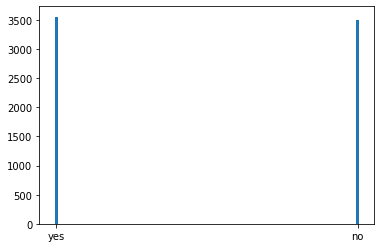

In [52]:
plt.bar(['yes','no'],[df['PARK_FACIL'].value_counts()[0],df['PARK_FACIL'].value_counts()[1]],width=0.01)

In [53]:
df_PARK_FACIL=df[['AREA','PARK_FACIL']]
df_PARK_FACIL

,AREA,PARK_FACIL
0,karapakkam,yes
1,anna nagar,no
2,adyar,yes
3,velachery,no
4,karapakkam,yes
...,...,...
7051,karapakkam,yes
7052,velachery,yes
7053,tnagar,yes
7054,chrompet,yes


In [54]:
print('Park Facility available percentage in the given areas is: ',round((df[df['PARK_FACIL']=='yes'].shape[0]/df.shape[0])*100,2))
print('Park Facility Not available percentage in the given areas is: ',round((df[df['PARK_FACIL']=='no'].shape[0]/df.shape[0])*100,2))

Park Facility available percentage in the given areas is:  50.41
Park Facility Not available percentage in the given areas is:  49.59


In [55]:
le=LabelEncoder()
df['PARK_FACIL']=le.fit_transform(df['PARK_FACIL'])

In [56]:
df.head()

,index,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,year_sold,year_build,Year_difference
0,0,karapakkam,1004,2011-05-04 00:00:00,131,1.0,1.0,3,0,1,...,4.0,3.9,4.9,4.330,380000,144400,7600000,2011,1967,44
1,1,anna nagar,1986,2006-12-19 00:00:00,26,2.0,1.0,5,0,0,...,4.9,4.2,2.5,3.765,760122,304049,21717770,2006,1995,11
2,2,adyar,909,2012-02-04 00:00:00,70,1.0,1.0,3,0,1,...,4.1,3.8,2.2,3.090,421094,92114,13159200,2012,1992,20
3,3,velachery,1855,2010-03-13 00:00:00,14,3.0,2.0,5,2,0,...,4.7,3.9,3.6,4.010,356321,77042,9630290,2010,1988,22
4,4,karapakkam,1226,2009-10-05 00:00:00,84,1.0,1.0,3,0,1,...,3.0,2.5,4.1,3.290,237000,74063,7406250,2009,1979,30


# **5.11 Analysis of BUILDTYPE**

In [57]:
df['BUILDTYPE'].value_counts()

House         2433
Commercial    2307
Others        2287
Other           25
Comercial        4
Name: BUILDTYPE, dtype: int64

In [58]:
for i in range(0,df.shape[0],1):
  if df['BUILDTYPE'][i]=='House':
    df['BUILDTYPE'][i]='house'
  elif df['BUILDTYPE'][i]=='Commercial' or df['BUILDTYPE'][i]=='Comercial':
    df['BUILDTYPE'][i]='commercial'
  elif df['BUILDTYPE'][i]=='Others' or df['BUILDTYPE'][i]=='Other':
    df['BUILDTYPE'][i]='others'

E:\Anaconda\envs\chpp\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
E:\Anaconda\envs\chpp\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
E:\Anaconda\envs\chpp\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [59]:
df_BUILDTYPE=df[['AREA','BUILDTYPE']]
df_BUILDTYPE

,AREA,BUILDTYPE
0,karapakkam,commercial
1,anna nagar,commercial
2,adyar,commercial
3,velachery,others
4,karapakkam,others
...,...,...
7051,karapakkam,commercial
7052,velachery,others
7053,tnagar,commercial
7054,chrompet,house


In [60]:
df['BUILDTYPE'].value_counts()

house         2433
others        2312
commercial    2311
Name: BUILDTYPE, dtype: int64

<BarContainer object of 3 artists>

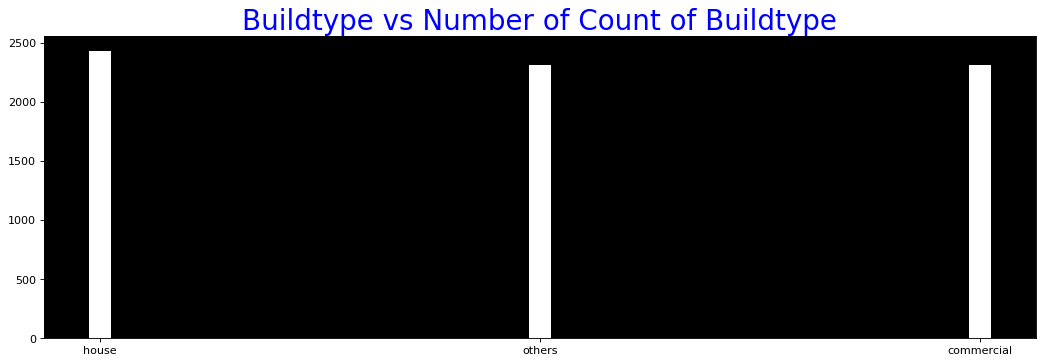

In [61]:
plt.figure(figsize=(16,5),dpi=80)
ax=plt.axes()
ax.set_facecolor('black')
plt.title('Buildtype vs Number of Count of Buildtype',color='Blue',fontsize=25)
plt.bar(df['BUILDTYPE'].value_counts().index,df['BUILDTYPE'].value_counts(),width=0.05,color='white')

In [62]:
le=LabelEncoder()
df['BUILDTYPE']=le.fit_transform(df['BUILDTYPE'])
df['BUILDTYPE'].value_counts()

1    2433
2    2312
0    2311
Name: BUILDTYPE, dtype: int64

# **5.12 Analysis of UTILITY_AVAIL**

In [63]:
df_UTILITY_AVAIL=df[['AREA','UTILITY_AVAIL']]
df_UTILITY_AVAIL

,AREA,UTILITY_AVAIL
0,karapakkam,AllPub
1,anna nagar,AllPub
2,adyar,ELO
3,velachery,NoSewr
4,karapakkam,AllPub
...,...,...
7051,karapakkam,ELO
7052,velachery,ELO
7053,tnagar,AllPub
7054,chrompet,AllPub


In [64]:
df['UTILITY_AVAIL'].value_counts()

AllPub     1874
NoSeWa     1860
NoSewr     1812
ELO        1509
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

In [65]:
for i in range(0,df.shape[0],1):
  if df['UTILITY_AVAIL'][i]=='AllPub' or df['UTILITY_AVAIL'][i]=='All Pub':
    df['UTILITY_AVAIL'][i]='allpub'
  elif df['UTILITY_AVAIL'][i]=='NoSeWa' or df['UTILITY_AVAIL'][i]=='NoSewr ':
    df['UTILITY_AVAIL'][i]='nosewage'
  elif df['UTILITY_AVAIL'][i]=='ELO':
    df['UTILITY_AVAIL'][i]='elo'

E:\Anaconda\envs\chpp\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
E:\Anaconda\envs\chpp\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
E:\Anaconda\envs\chpp\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [66]:
df['UTILITY_AVAIL'].value_counts()

nosewage    3672
allpub      1875
elo         1509
Name: UTILITY_AVAIL, dtype: int64

In [67]:
le=LabelEncoder()
df['UTILITY_AVAIL']=le.fit_transform(df['UTILITY_AVAIL'])
df['UTILITY_AVAIL'].value_counts()

2    3672
0    1875
1    1509
Name: UTILITY_AVAIL, dtype: int64

# **5.13 Analysis of STREET**

In [68]:
df_STREET=df[['AREA','STREET']]
df_STREET

,AREA,STREET
0,karapakkam,Paved
1,anna nagar,Gravel
2,adyar,Gravel
3,velachery,Paved
4,karapakkam,Gravel
...,...,...
7051,karapakkam,Paved
7052,velachery,Paved
7053,tnagar,Gravel
7054,chrompet,Pavd


In [69]:
df['STREET'].value_counts()

Paved        2542
Gravel       2502
No Access    1993
Pavd           12
NoAccess        7
Name: STREET, dtype: int64

In [70]:
for i in range(0,df.shape[0],1):
  if df['STREET'][i]=='Paved' or df['STREET'][i]=='Pavd':
    df['STREET'][i]='paved'
  elif df['STREET'][i]=='Gravel' or df['STREET'][i]=='gravel ':
    df['STREET'][i]='gravel'
  elif df['STREET'][i]=='No Access' or df['STREET'][i]=='NoAccess':
    df['STREET'][i]='no access'

E:\Anaconda\envs\chpp\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
E:\Anaconda\envs\chpp\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
E:\Anaconda\envs\chpp\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [71]:
df['STREET'].value_counts()

paved        2554
gravel       2502
no access    2000
Name: STREET, dtype: int64

In [72]:
le=LabelEncoder()
df['STREET']=le.fit_transform(df['STREET'])
df['STREET'].value_counts()

2    2554
0    2502
1    2000
Name: STREET, dtype: int64

# **5.15 Decision Execution - Removing the Unwanted Column or Less information Columns**

In [73]:
#'QS_OVERALL','MZZONE''QS_ROOMS','QS_BATHROOM','QS_BEDROOM'

In [74]:
df=df.drop(columns=['DATE_SALE','DATE_BUILD','REG_FEE','COMMIS','year_build','year_sold'],axis=1)
#SALE_COND
#column by column cleaning required

**5.2.6 Average Sales Price with area**

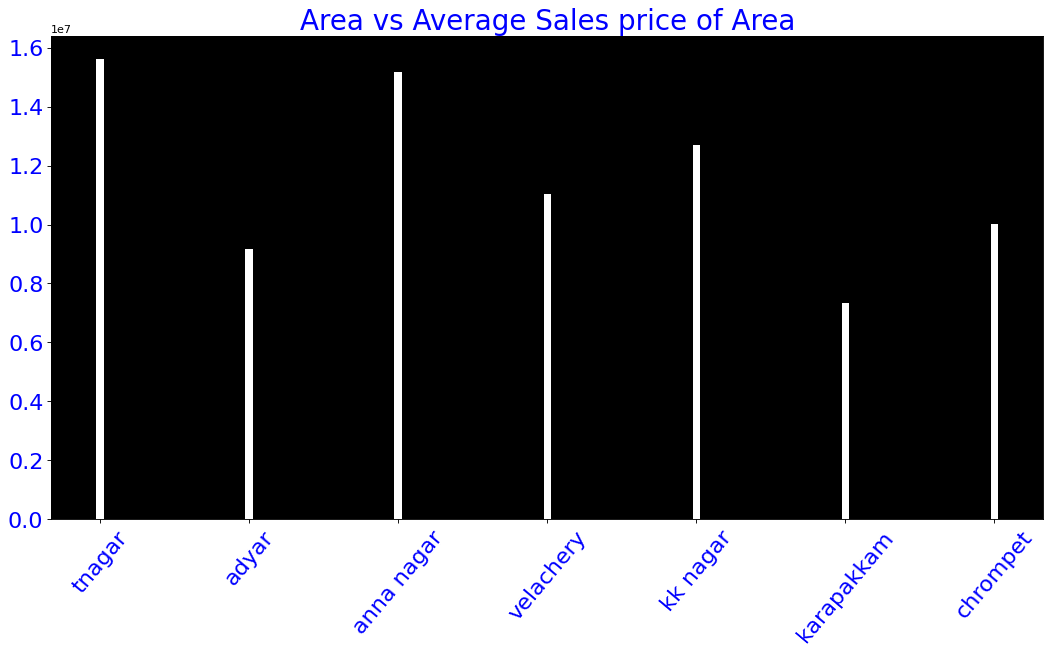

The average sales price of  karapakkam is 15619690.383838383
The average sales price of  anna nagar is 9180045.89076723
The average sales price of  adyar is 15171375.881595882
The average sales price of  velachery is 11048069.323076922
The average sales price of  karapakkam is 12706966.484848484
The average sales price of  chrompet is 7339913.079470199
The average sales price of  chrompet is 10005747.250147842


In [75]:
average_sales_price_areawise=[]
for i in range(0,len(area),1):
  average_sales_price_areawise.append(df[df['AREA']==area[i]]['SALES_PRICE'].mean())
 
plt.figure(figsize=(16,8),dpi=80)
ax=plt.axes()
ax.set_facecolor('black')
plt.bar(area,average_sales_price_areawise,width=0.05,color='white')
plt.title('Area vs Average Sales price of Area',color='blue',fontsize=25)
plt.xticks(rotation=50,color='blue',fontsize=20)
plt.yticks(color='blue',fontsize=20)
plt.show()
for i in range(0,len(area),1):
  print('The average sales price of ',df['AREA'][i],'is',average_sales_price_areawise[i]) 

In [76]:
dd=average_sales_price_areawise.copy()
dd.remove(15619690.383838383)
dd.remove(15171375.881595882)
np.max(dd)

12706966.484848484

In [77]:
dd

[9180045.89076723,
 11048069.323076922,
 12706966.484848484,
 7339913.079470199,
 10005747.250147842]

**Order By High Cost Price of House in Area**
1.Karapakkam,Adyar

# **5.16 Analysis of SALES_PRICE**

***************************** AREA *****************************


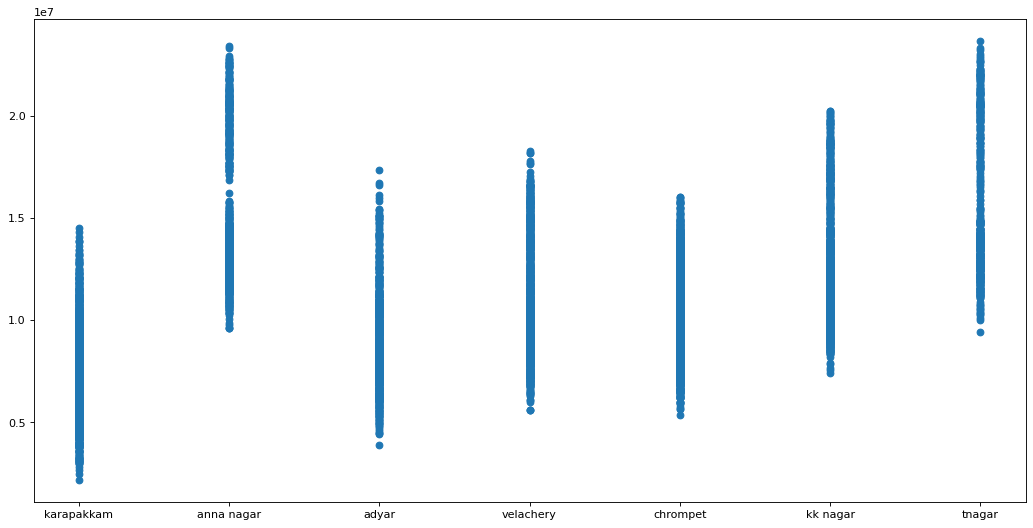

***************************** INT_SQFT *****************************


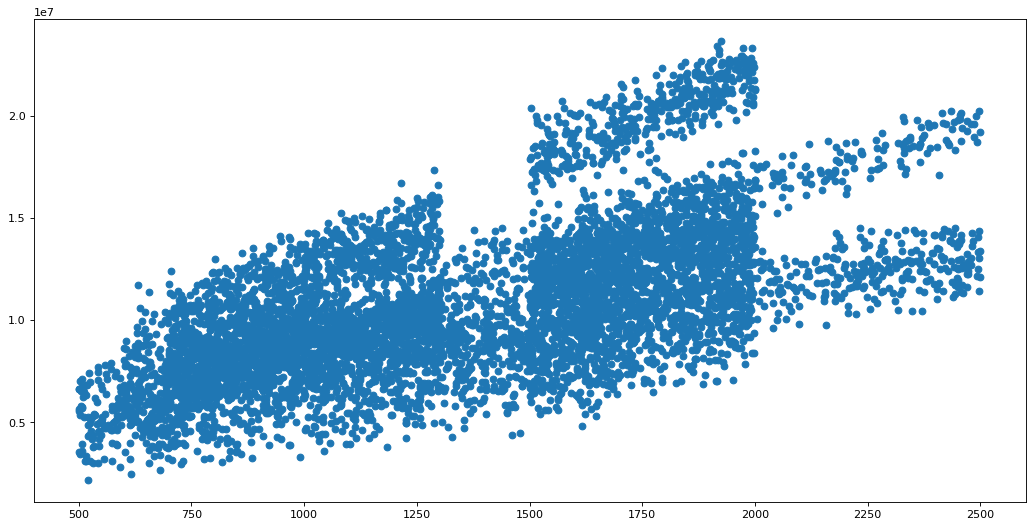

***************************** DIST_MAINROAD *****************************


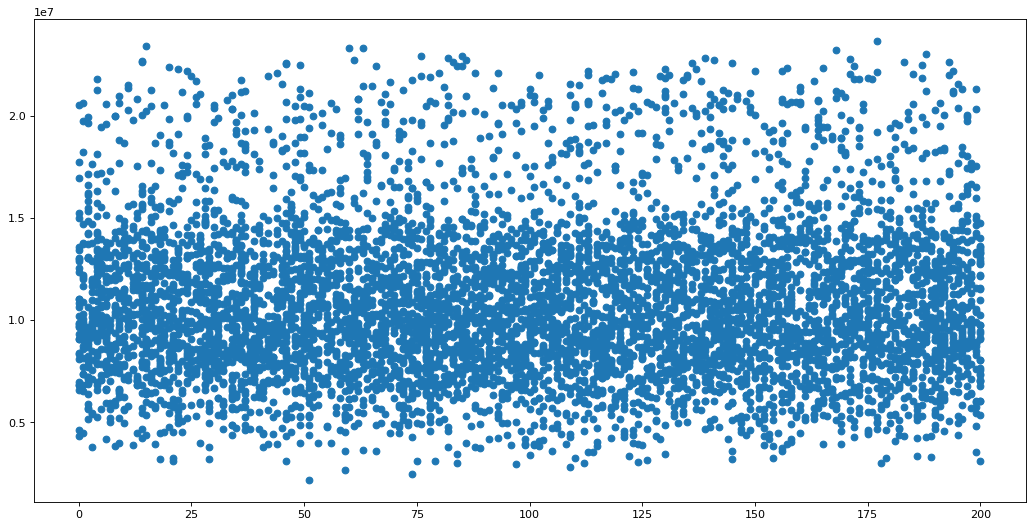

***************************** N_BEDROOM *****************************


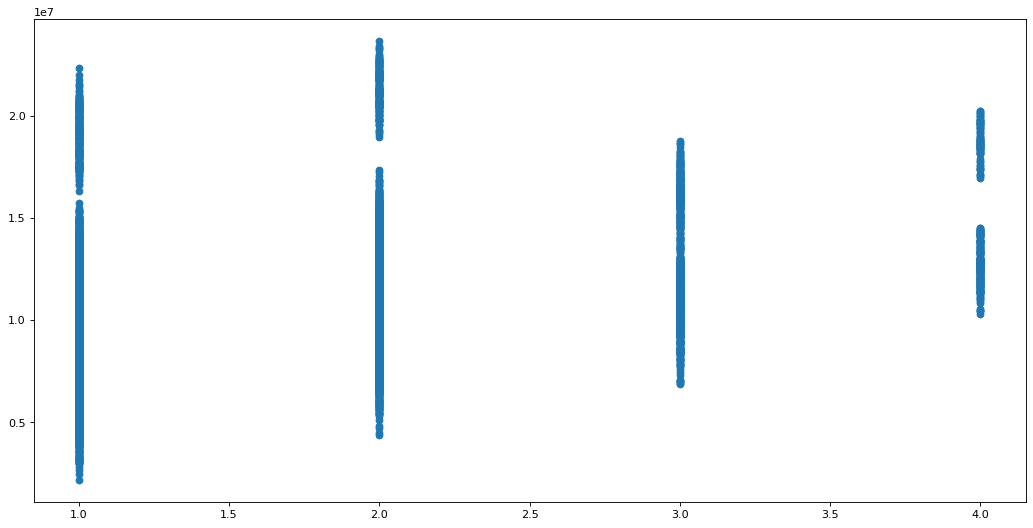

***************************** N_BATHROOM *****************************


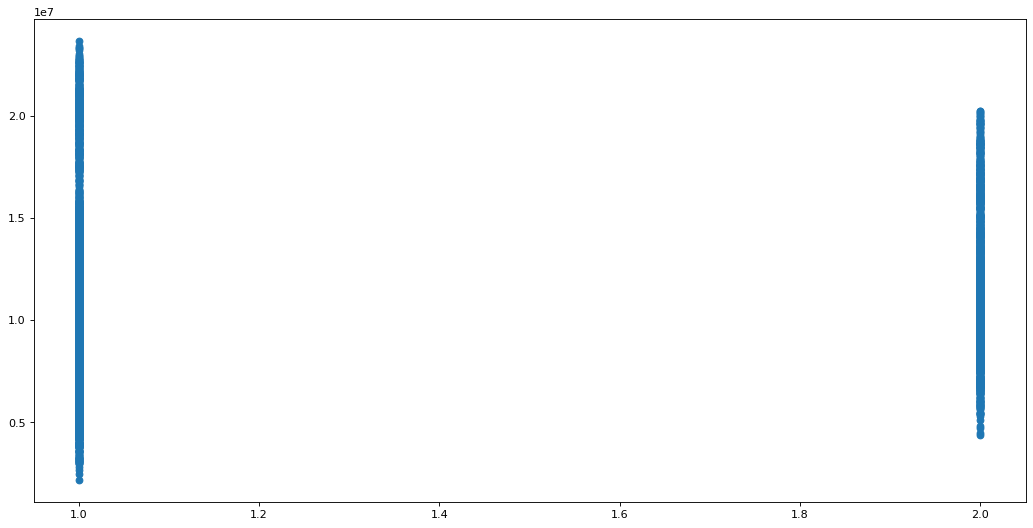

***************************** N_ROOM *****************************


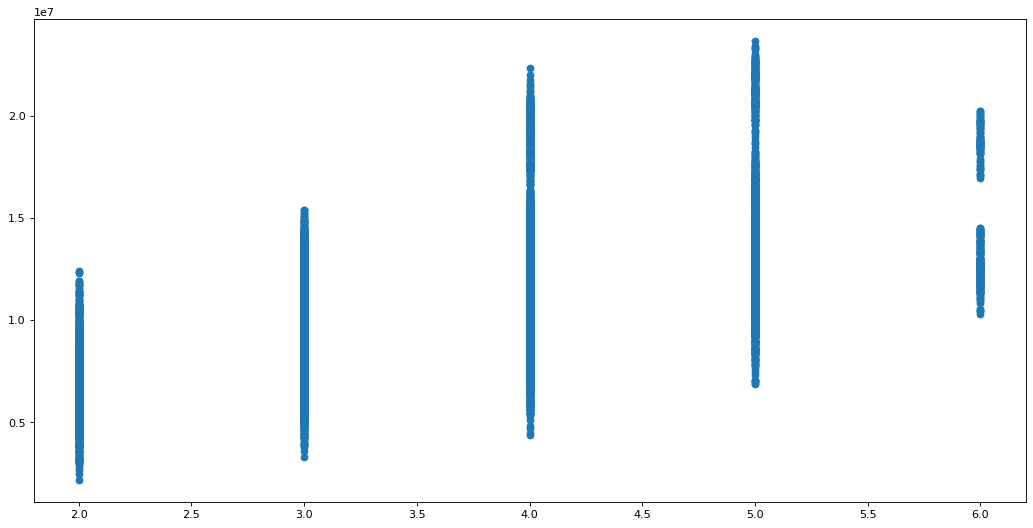

***************************** SALE_COND *****************************


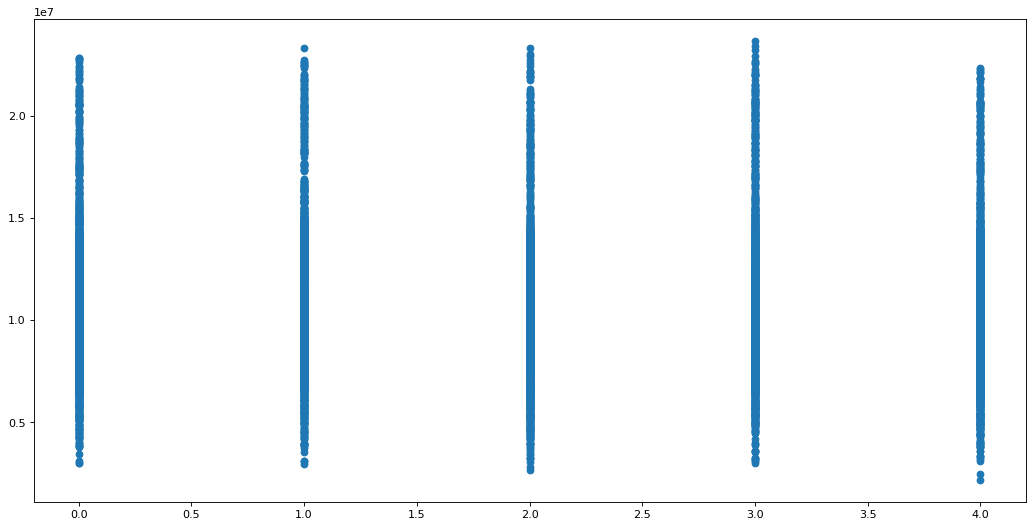

***************************** PARK_FACIL *****************************


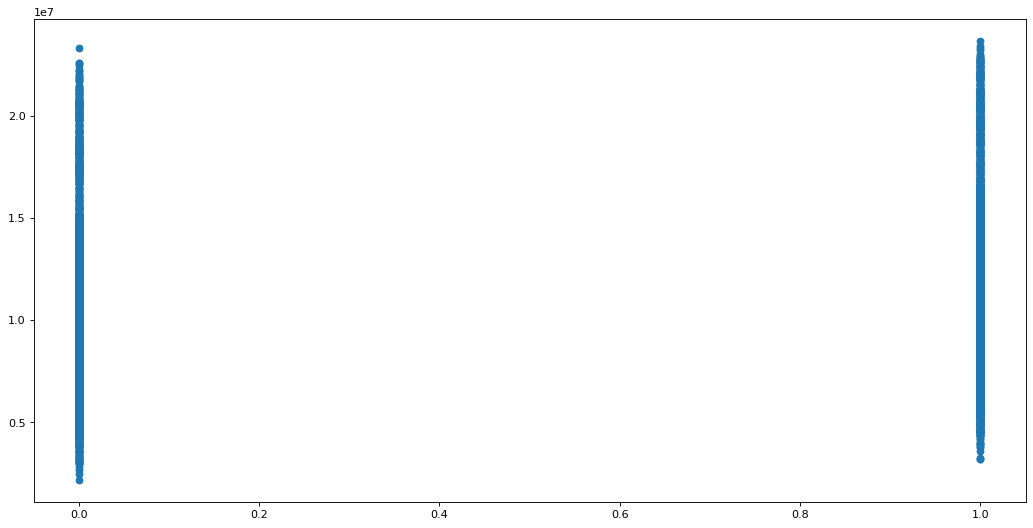

***************************** BUILDTYPE *****************************


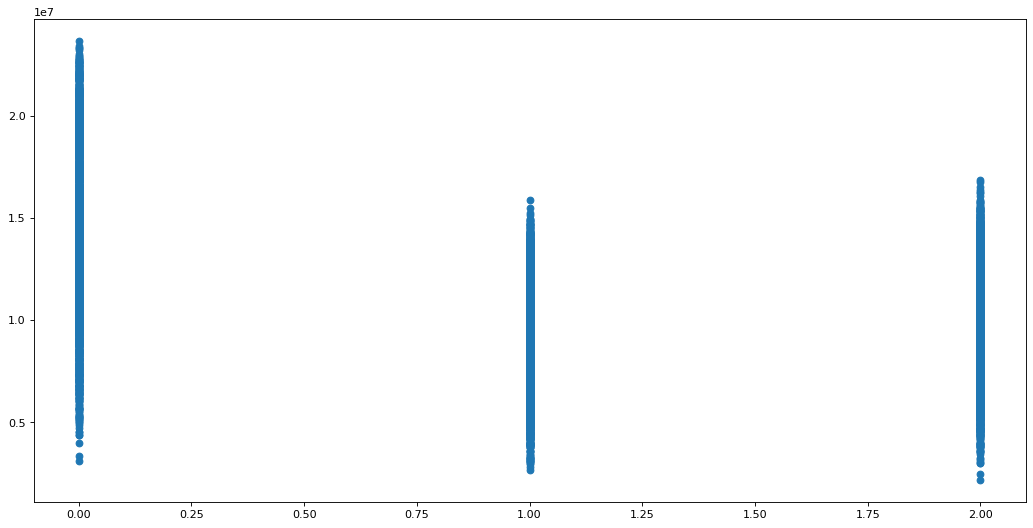

***************************** UTILITY_AVAIL *****************************


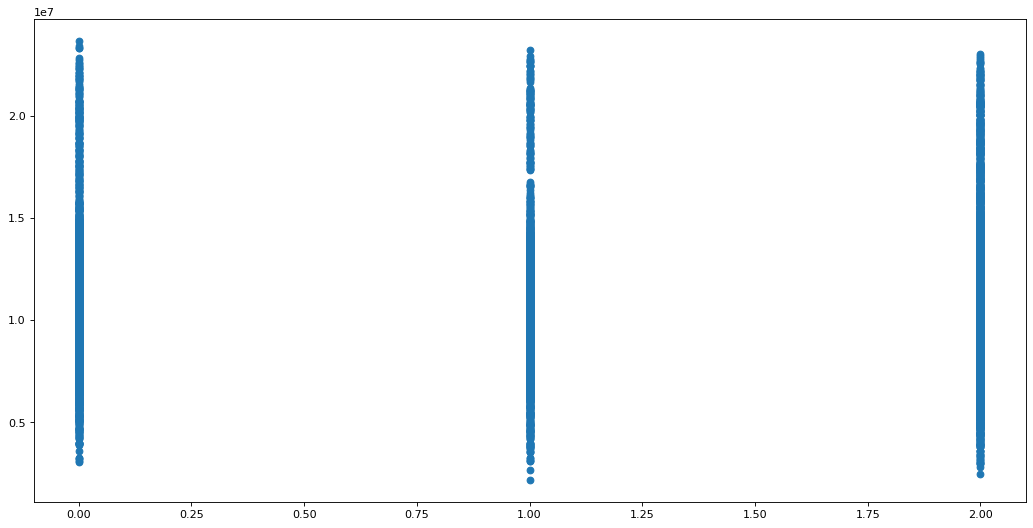

***************************** STREET *****************************


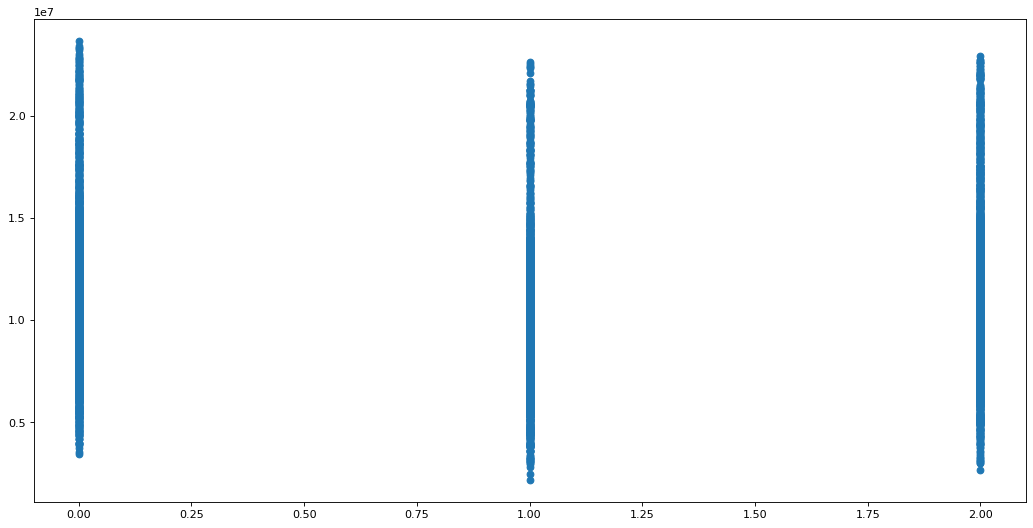

***************************** MZZONE *****************************


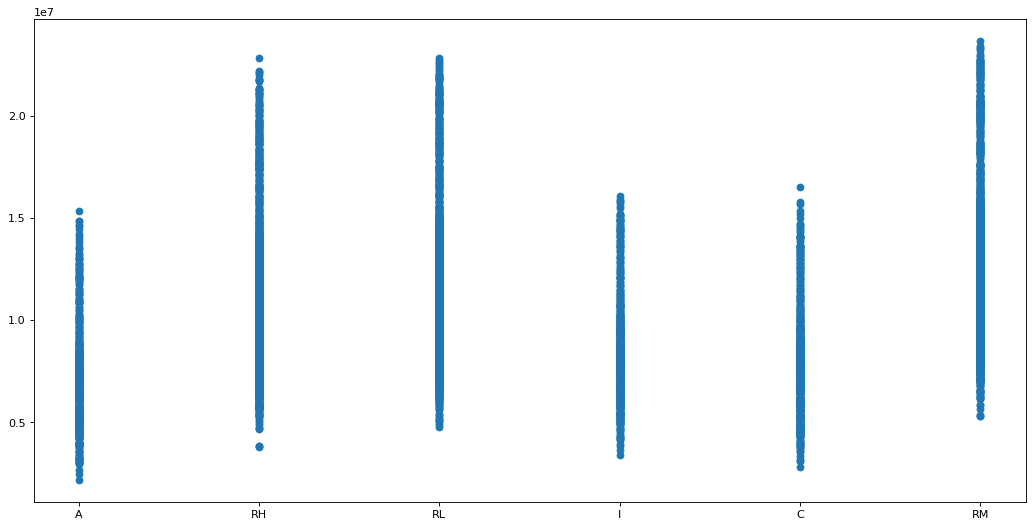

***************************** QS_ROOMS *****************************


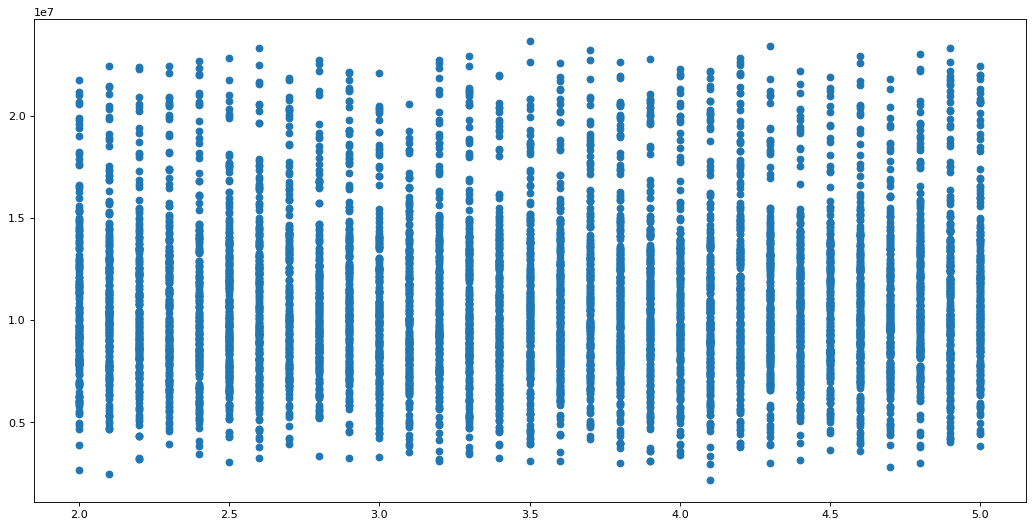

***************************** QS_BATHROOM *****************************


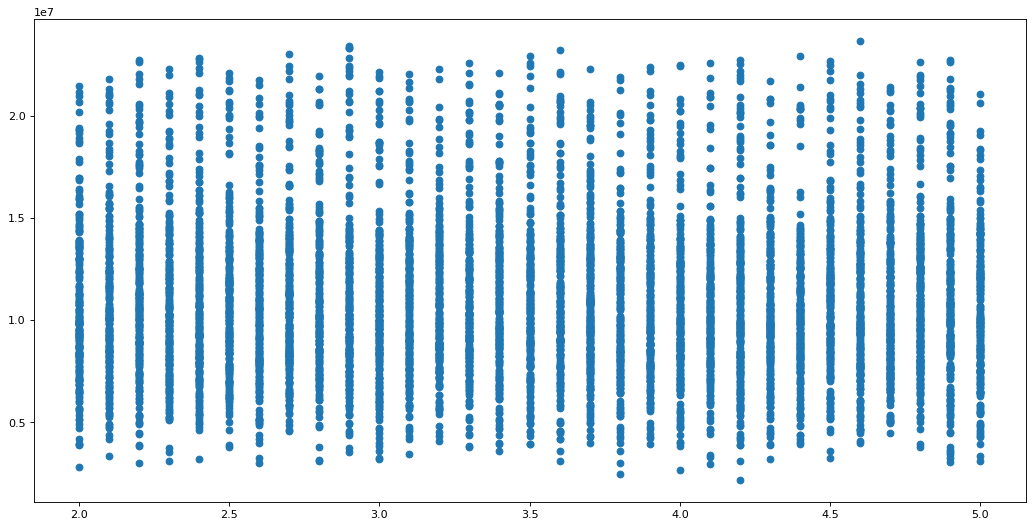

***************************** QS_BEDROOM *****************************


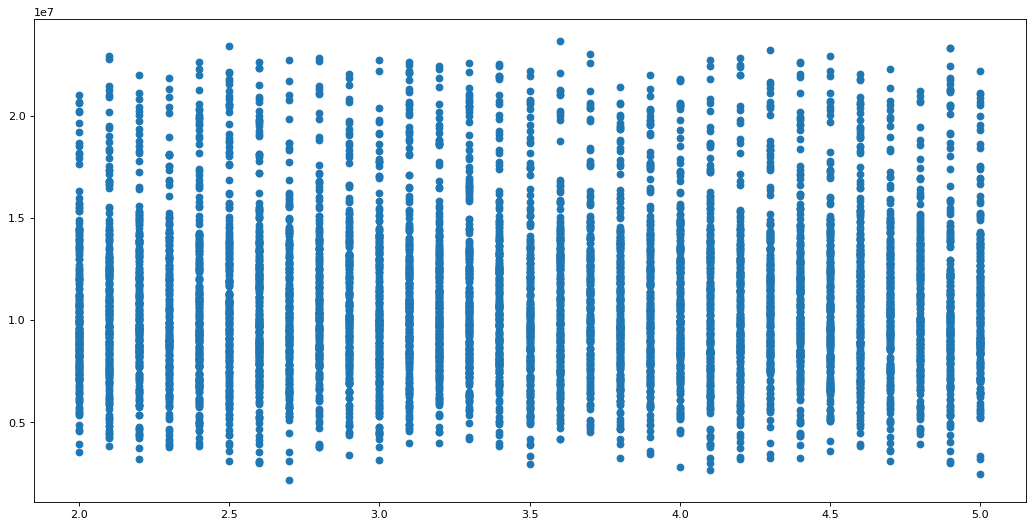

***************************** QS_OVERALL *****************************


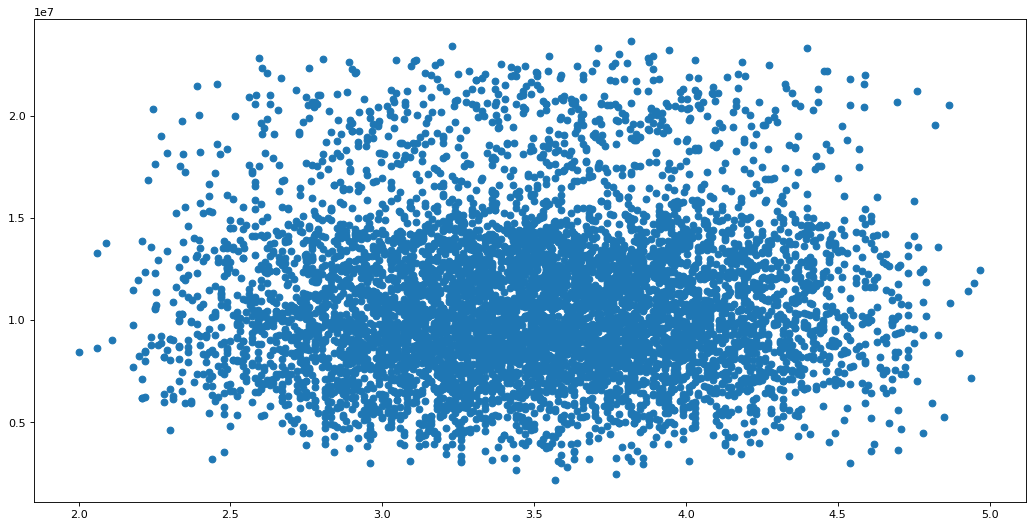

***************************** SALES_PRICE *****************************


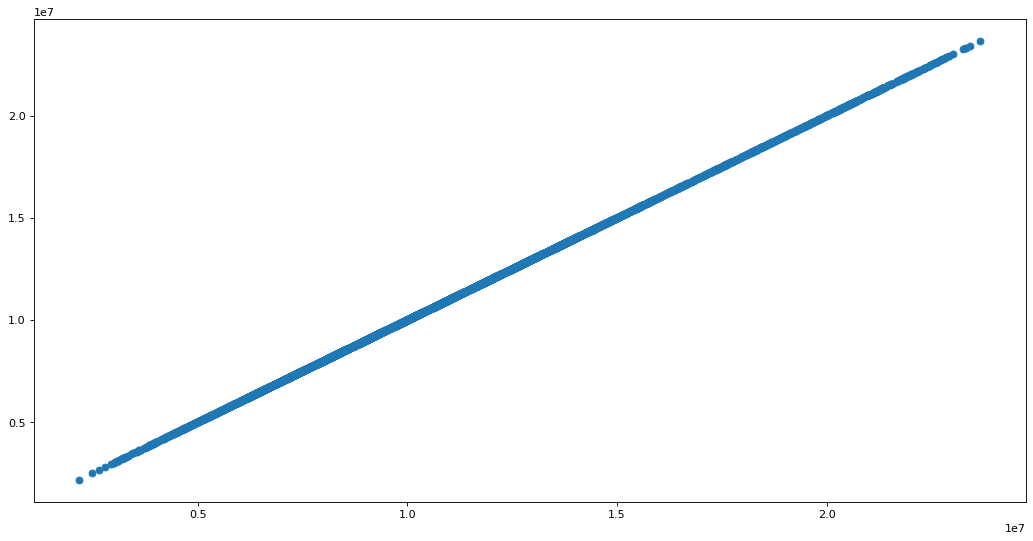

In [78]:
for i in range(1,len(df.columns)-1,1):
  print('*****************************',df.columns[i],'*****************************')
  plt.figure(figsize=(16,8),dpi=80)
  plt.scatter(df[df.columns[i]],df['SALES_PRICE'])
  plt.show()


In [79]:
df_SALES_PRICE=df[['AREA','SALES_PRICE']]
df_SALES_PRICE

,AREA,SALES_PRICE
0,karapakkam,7600000
1,anna nagar,21717770
2,adyar,13159200
3,velachery,9630290
4,karapakkam,7406250
...,...,...
7051,karapakkam,8507000
7052,velachery,9976480
7053,tnagar,23307000
7054,chrompet,9735150


In [80]:
df.columns

Index(['index', 'AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'SALES_PRICE', 'Year_difference'],
      dtype='object')

In [81]:
df['DIST_MAINROAD']=round(df['DIST_MAINROAD']/100,2)
df['DIST_MAINROAD']

0       1.31
1       0.26
2       0.70
3       0.14
4       0.84
        ... 
7051    0.40
7052    1.56
7053    0.63
7054    0.44
7055    0.75
Name: DIST_MAINROAD, Length: 7056, dtype: float64

In [82]:
df['SALES_PRICE']=df['SALES_PRICE']/100000

In [83]:
df.head(3)
df1=df.copy()

In [84]:
df.insert(len(df.columns)-1, 'SALES_PRICE', df.pop('SALES_PRICE')) #It is used to move the Sales_Price to transfer to last column

In [85]:
for i in range(0,df.shape[0],1):
  if df['AREA'][i]=='tnagar':
    df['AREA'][i]=0
  elif df['AREA'][i]=='anna nagar':
    df['AREA'][i]=1
  elif df['AREA'][i]=='adyar':
    df['AREA'][i]=2
  elif df['AREA'][i]=='kk nagar':
    df['AREA'][i]=3
  elif df['AREA'][i]=='velachery':
    df['AREA'][i]=4
  elif df['AREA'][i]=='karapakkam':
    df['AREA'][i]=5
  elif df['AREA'][i]=='chrompet':
    df['AREA'][i]=6

E:\Anaconda\envs\chpp\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
E:\Anaconda\envs\chpp\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
E:\Anaconda\envs\chpp\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
E:\Anaconda\envs\chpp\lib\site-packages\ipykernel_launcher.py:11: SettingW

In [86]:
df['AREA']=le.fit_transform(df['AREA'])

In [87]:
df.head(2)

,index,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,Year_difference,SALES_PRICE
0,0,5,1004,1.31,1.0,1.0,3,0,1,0,0,2,A,4.0,3.9,4.9,4.330,44,76.0000
1,1,1,1986,0.26,2.0,1.0,5,0,0,0,0,0,RH,4.9,4.2,2.5,3.765,11,217.1777


# **5.17 Information about the Cleaned Data**

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7056 entries, 0 to 7055
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            7056 non-null   int64  
 1   AREA             7056 non-null   int32  
 2   INT_SQFT         7056 non-null   int64  
 3   DIST_MAINROAD    7056 non-null   float64
 4   N_BEDROOM        7056 non-null   float64
 5   N_BATHROOM       7056 non-null   float64
 6   N_ROOM           7056 non-null   int64  
 7   SALE_COND        7056 non-null   int32  
 8   PARK_FACIL       7056 non-null   int32  
 9   BUILDTYPE        7056 non-null   int32  
 10  UTILITY_AVAIL    7056 non-null   int32  
 11  STREET           7056 non-null   int32  
 12  MZZONE           7056 non-null   object 
 13  QS_ROOMS         7056 non-null   float64
 14  QS_BATHROOM      7056 non-null   float64
 15  QS_BEDROOM       7056 non-null   float64
 16  QS_OVERALL       7056 non-null   float64
 17  Year_differenc

# **5.17.1 Description about the Cleaned Data**

In [89]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,7056.0,3565.048186,2046.585958,0.00000,1797.7500,3565.50000,5335.250000,7108.0000
AREA,7056.0,3.702664,1.937294,0.00000,2.0000,4.00000,5.000000,6.0000
INT_SQFT,7056.0,1381.316752,457.860850,500.00000,991.0000,1369.50000,1744.000000,2500.0000
DIST_MAINROAD,7056.0,0.995692,0.574039,0.00000,0.5000,0.99000,1.480000,2.0000
N_BEDROOM,7056.0,1.636621,0.803633,1.00000,1.0000,1.00000,2.000000,4.0000
N_BATHROOM,7056.0,1.213152,0.409563,1.00000,1.0000,1.00000,1.000000,2.0000
N_ROOM,7056.0,3.686650,1.020011,2.00000,3.0000,4.00000,4.000000,6.0000
SALE_COND,7056.0,2.002268,1.414713,0.00000,1.0000,2.00000,3.000000,4.0000
PARK_FACIL,7056.0,0.504110,0.500019,0.00000,0.0000,1.00000,1.000000,1.0000
BUILDTYPE,7056.0,1.000142,0.809494,0.00000,0.0000,1.00000,2.000000,2.0000


# **5.17.2 Preview of the Cleaned Data**

In [90]:
df.head()


,index,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,Year_difference,SALES_PRICE
0,0,5,1004,1.31,1.0,1.0,3,0,1,0,0,2,A,4.0,3.9,4.9,4.330,44,76.0000
1,1,1,1986,0.26,2.0,1.0,5,0,0,0,0,0,RH,4.9,4.2,2.5,3.765,11,217.1777
2,2,2,909,0.70,1.0,1.0,3,0,1,0,1,0,RL,4.1,3.8,2.2,3.090,20,131.5920
3,3,4,1855,0.14,3.0,2.0,5,2,0,2,2,2,I,4.7,3.9,3.6,4.010,22,96.3029
4,4,5,1226,0.84,1.0,1.0,3,0,1,2,0,0,C,3.0,2.5,4.1,3.290,30,74.0625


In [91]:
df['SALES_PRICE'].describe()

count    7056.000000
mean      108.880082
std        37.690813
min        21.568750
25%        82.667900
50%       103.192250
75%       129.814775
max       236.673400
Name: SALES_PRICE, dtype: float64

In [92]:
df['MZZONE'].value_counts()

RL    1849
RH    1808
RM    1801
C      547
A      533
I      518
Name: MZZONE, dtype: int64

In [93]:
df['MZZONE']=le.fit_transform(df['MZZONE'])

In [94]:
df=df.drop(columns=['index'])

In [95]:
df

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,Year_difference,SALES_PRICE
0,5,1004,1.31,1.0,1.0,3,0,1,0,0,2,0,4.0,3.9,4.9,4.330,44,76.0000
1,1,1986,0.26,2.0,1.0,5,0,0,0,0,0,3,4.9,4.2,2.5,3.765,11,217.1777
2,2,909,0.70,1.0,1.0,3,0,1,0,1,0,4,4.1,3.8,2.2,3.090,20,131.5920
3,4,1855,0.14,3.0,2.0,5,2,0,2,2,2,2,4.7,3.9,3.6,4.010,22,96.3029
4,5,1226,0.84,1.0,1.0,3,0,1,2,0,0,1,3.0,2.5,4.1,3.290,30,74.0625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7051,5,787,0.40,1.0,1.0,2,4,1,0,1,2,4,4.6,3.8,4.1,4.160,32,85.0700
7052,4,1896,1.56,3.0,2.0,5,4,1,2,1,2,2,3.1,3.5,4.3,3.640,44,99.7648
7053,0,1973,0.63,2.0,1.0,5,2,1,0,0,0,5,2.6,2.9,4.9,3.710,35,233.0700
7054,6,1023,0.44,1.0,1.0,3,4,1,1,0,2,5,3.0,2.8,3.6,3.100,17,97.3515


In [96]:
df.describe()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,Year_difference,SALES_PRICE
count,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000
mean,3.702664,1381.316752,0.995692,1.636621,1.213152,3.686650,2.002268,0.504110,1.000142,1.254677,1.007370,3.317460,3.517177,3.505896,3.485332,3.503389,24.273526,108.880082
std,1.937294,457.860850,0.574039,0.803633,0.409563,1.020011,1.414713,0.500019,0.809494,0.849342,0.846523,1.498636,0.892141,0.897644,0.886814,0.527313,12.331565,37.690813
min,0.000000,500.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,3.000000,21.568750
25%,2.000000,991.000000,0.500000,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2.700000,2.700000,2.700000,3.130000,14.000000,82.667900
50%,4.000000,1369.500000,0.990000,1.000000,1.000000,4.000000,2.000000,1.000000,1.000000,2.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,23.000000,103.192250
75%,5.000000,1744.000000,1.480000,2.000000,1.000000,4.000000,3.000000,1.000000,2.000000,2.000000,2.000000,5.000000,4.300000,4.300000,4.300000,3.890000,34.000000,129.814775
max,6.000000,2500.000000,2.000000,4.000000,2.000000,6.000000,4.000000,1.000000,2.000000,2.000000,2.000000,5.000000,5.000000,5.000000,5.000000,4.970000,55.000000,236.673400


In [97]:
df.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'Year_difference', 'SALES_PRICE'],
      dtype='object')

0
***************** AREA *****************


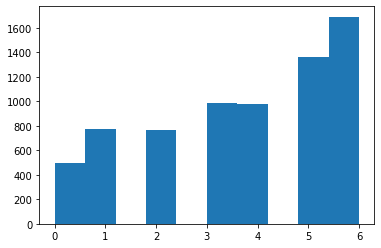

1
***************** INT_SQFT *****************


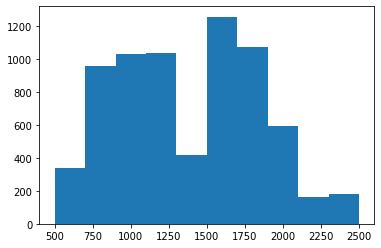

2
***************** DIST_MAINROAD *****************


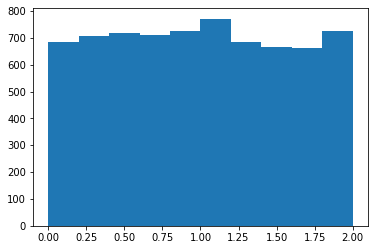

3
***************** N_BEDROOM *****************


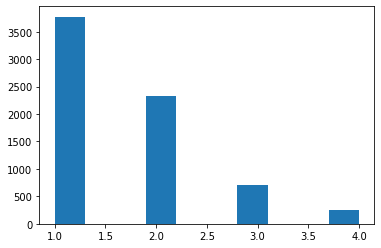

4
***************** N_BATHROOM *****************


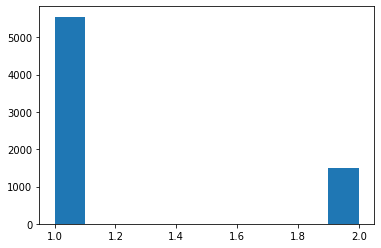

5
***************** N_ROOM *****************


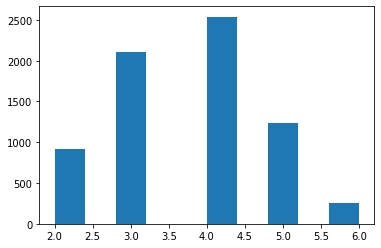

6
***************** SALE_COND *****************


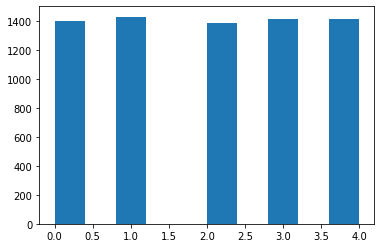

7
***************** PARK_FACIL *****************


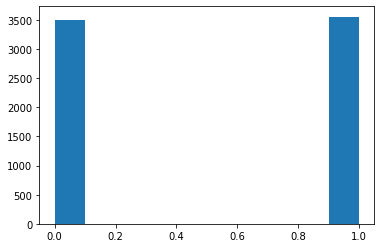

8
***************** BUILDTYPE *****************


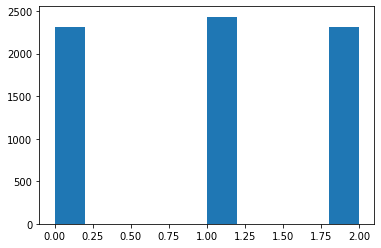

9
***************** UTILITY_AVAIL *****************


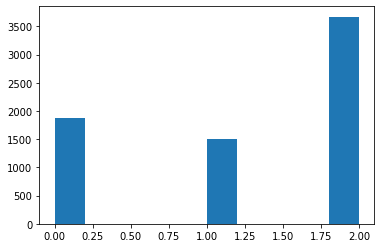

10
***************** STREET *****************


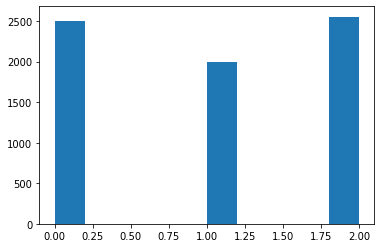

11
***************** MZZONE *****************


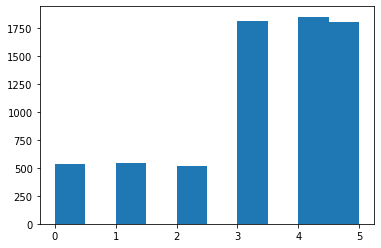

12
***************** QS_ROOMS *****************


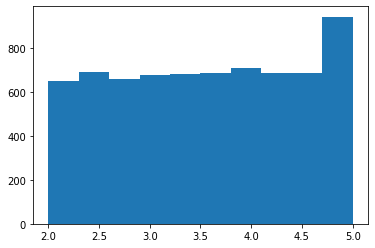

13
***************** QS_BATHROOM *****************


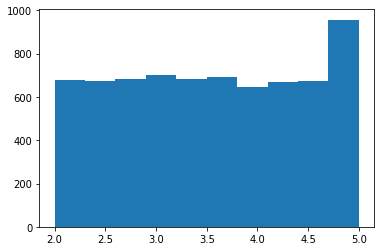

14
***************** QS_BEDROOM *****************


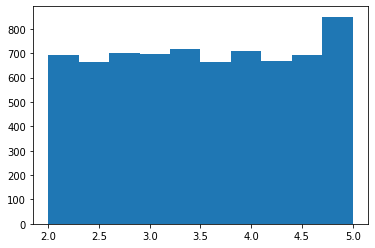

15
***************** QS_OVERALL *****************


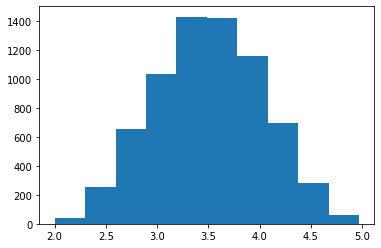

16
***************** Year_difference *****************


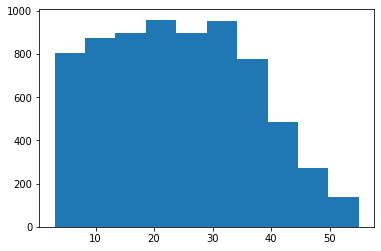

In [98]:
for i in range(0,17,1):
  if df.columns[i]!='SALES_PRICE':
      print(i)
      print('*****************',df.columns[i],'*****************')
      plt.hist(df[df.columns[i]])
      plt.show()

# **6. Machine Learning Model**

# **6.1 Selection of Best test size value**

# **6.1.1 Linear Regression**

In [99]:
X=df.iloc[:,0:-1].values
y=df.iloc[:,17:].values
re_chart=[]
te=[]
for i in range(10,31,1):
  zz=float('0.'+str(i))
  print(zz)
  te.append(zz)
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=zz,random_state=0)
  # print('X',X.shape)
  # print('y',y.shape)
  print('X_train',X_train.shape)
  print('y_train',y_train.shape)
  print('X_test',X_test.shape)
  print('y_test',y_test.shape)
  scale=StandardScaler()
  scaled_X_train=scale.fit_transform(X_train)
  scaled_X_train
  scaled_X_test=scale.fit_transform(X_test)
  scaled_X_test
  linear=LinearRegression()
  linear.fit(scaled_X_train,y_train)
  # print('Coefficient value',linear.coef_)
  # print()
  # print('Intercept value or constant value',linear.intercept_)
  # print()
  pred=linear.predict(scaled_X_test)
  print('R2 Score',round(metrics.r2_score(y_test,pred)*100,2))
  re_chart.append(round(metrics.r2_score(y_test,pred)*100,2))
  print('Mean Absolute Error',metrics.mean_absolute_error(y_test,pred))
  print('Mean Squared Error',metrics.mean_squared_error(y_test,pred))
  print('******************************************')
print(np.max(re_chart))

0.1
X_train (6350, 17)
y_train (6350, 1)
X_test (706, 17)
y_test (706, 1)
R2 Score 79.25
Mean Absolute Error 14.244142626966651
Mean Squared Error 296.1114605604246
******************************************
0.11
X_train (6279, 17)
y_train (6279, 1)
X_test (777, 17)
y_test (777, 1)
R2 Score 78.58
Mean Absolute Error 14.255034883022802
Mean Squared Error 294.5699123163102
******************************************
0.12
X_train (6209, 17)
y_train (6209, 1)
X_test (847, 17)
y_test (847, 1)
R2 Score 78.88
Mean Absolute Error 14.147001238209171
Mean Squared Error 289.7839423958117
******************************************
0.13
X_train (6138, 17)
y_train (6138, 1)
X_test (918, 17)
y_test (918, 1)
R2 Score 78.85
Mean Absolute Error 14.091989126371026
Mean Squared Error 288.5409375300445
******************************************
0.14
X_train (6068, 17)
y_train (6068, 1)
X_test (988, 17)
y_test (988, 1)
R2 Score 79.23
Mean Absolute Error 14.076047995897262
Mean Squared Error 287.1207132159247

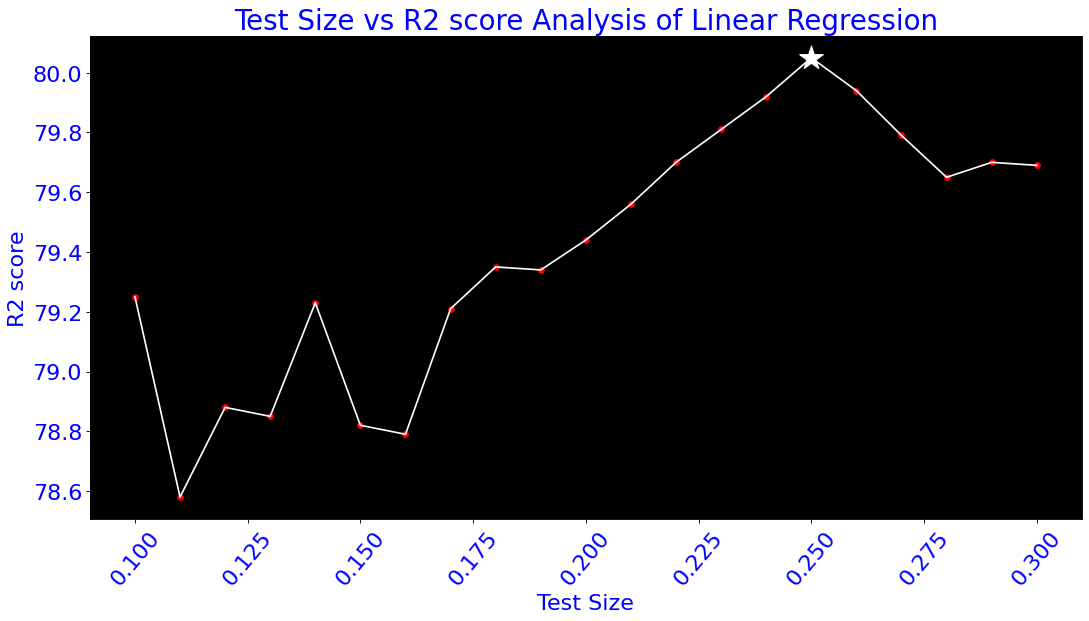

In [100]:
plt.figure(figsize=(16,8),dpi=80)
ax=plt.axes()
ax.set_facecolor('black')
plt.plot(te,re_chart,color='white')
plt.scatter(te,re_chart,color='red',s=25)
plt.scatter(te[15],re_chart[15],color='white',s=500,marker='*')
plt.title('Test Size vs R2 score Analysis of Linear Regression',color='blue',fontsize=25)
plt.xlabel('Test Size',color='blue',fontsize=20)
plt.ylabel('R2 score',color='blue',fontsize=20)
plt.xticks(color='blue',rotation=50,fontsize=20)
plt.yticks(color='blue',fontsize=20)
plt.show()

# **6.1.1 XG BOOST Regressor**

In [101]:
from xgboost import XGBRegressor
xg=XGBRegressor()

In [102]:
X=df.iloc[:,0:-1].values
y=df.iloc[:,17:].values
re_chart=[]
te=[]
for i in range(10,31,1):
  zz=float('0.'+str(i))
  print(zz)
  te.append(zz)
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=zz,random_state=0)
  # print('X',X.shape)
  # print('y',y.shape)
  print('X_train',X_train.shape)
  print('y_train',y_train.shape)
  print('X_test',X_test.shape)
  print('y_test',y_test.shape)
  scale=StandardScaler()
  scaled_X_train=scale.fit_transform(X_train)
  scaled_X_train
  scaled_X_test=scale.fit_transform(X_test)
  scaled_X_test
  xg=XGBRegressor()
  xg.fit(scaled_X_train,y_train)
  # print('Coefficient value',linear.coef_)
  # print()
  # print('Intercept value or constant value',linear.intercept_)
  # print()
  pred=xg.predict(scaled_X_test)
  print('R2 Score',round(metrics.r2_score(y_test,pred)*100,2))
  re_chart.append(round(metrics.r2_score(y_test,pred)*100,2))
  print('Mean Absolute Error',metrics.mean_absolute_error(y_test,pred))
  print('Mean Squared Error',metrics.mean_squared_error(y_test,pred))
  print('******************************************')
print(np.max(re_chart))

0.1
X_train (6350, 17)
y_train (6350, 1)
X_test (706, 17)
y_test (706, 1)
R2 Score 99.58
Mean Absolute Error 1.9282340680951773
Mean Squared Error 6.003422908899691
******************************************
0.11
X_train (6279, 17)
y_train (6279, 1)
X_test (777, 17)
y_test (777, 1)
R2 Score 99.43
Mean Absolute Error 2.131778507895451
Mean Squared Error 7.825293118933082
******************************************
0.12
X_train (6209, 17)
y_train (6209, 1)
X_test (847, 17)
y_test (847, 1)
R2 Score 99.5
Mean Absolute Error 1.9859379292890058
Mean Squared Error 6.860516885369888
******************************************
0.13
X_train (6138, 17)
y_train (6138, 1)
X_test (918, 17)
y_test (918, 1)
R2 Score 99.51
Mean Absolute Error 2.0128278727778683
Mean Squared Error 6.629496162722992
******************************************
0.14
X_train (6068, 17)
y_train (6068, 1)
X_test (988, 17)
y_test (988, 1)
R2 Score 99.5
Mean Absolute Error 1.9707075020021756
Mean Squared Error 6.866721729482017
**

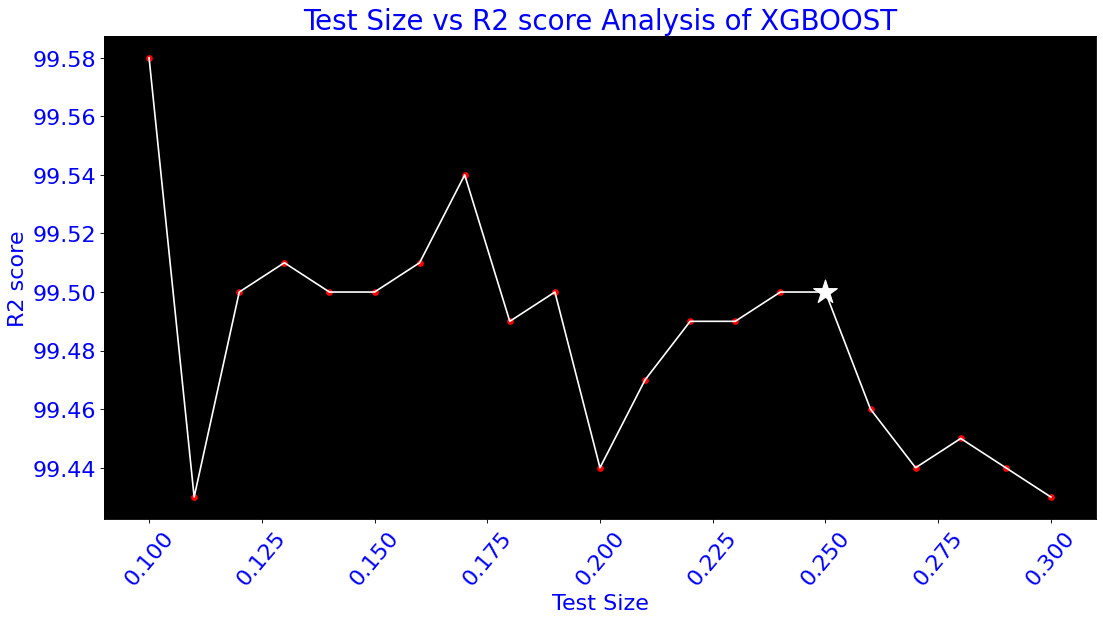

In [103]:
plt.figure(figsize=(16,8),dpi=80)
ax=plt.axes()
ax.set_facecolor('black')
plt.plot(te,re_chart,color='white')
plt.scatter(te,re_chart,color='red',s=25)
plt.scatter(te[15],re_chart[15],color='white',s=500,marker='*')
plt.title('Test Size vs R2 score Analysis of XGBOOST',color='blue',fontsize=25)
plt.xlabel('Test Size',color='blue',fontsize=20)
plt.ylabel('R2 score',color='blue',fontsize=20)
plt.xticks(color='blue',rotation=50,fontsize=20)
plt.yticks(color='blue',fontsize=20)
plt.show()

# **7. Final Model**

In [104]:
X=df.iloc[:,0:-1].values
y=df.iloc[:,17:].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
print('X',X.shape)
print('y',y.shape)
print('X_train',X_train.shape)
print('y_train',y_train.shape)
print('X_test',X_test.shape)
print('y_test',y_test.shape)

X (7056, 17)
y (7056, 1)
X_train (5292, 17)
y_train (5292, 1)
X_test (1764, 17)
y_test (1764, 1)


In [105]:
X

array([[5.000e+00, 1.004e+03, 1.310e+00, ..., 4.900e+00, 4.330e+00,
        4.400e+01],
       [1.000e+00, 1.986e+03, 2.600e-01, ..., 2.500e+00, 3.765e+00,
        1.100e+01],
       [2.000e+00, 9.090e+02, 7.000e-01, ..., 2.200e+00, 3.090e+00,
        2.000e+01],
       ...,
       [0.000e+00, 1.973e+03, 6.300e-01, ..., 4.900e+00, 3.710e+00,
        3.500e+01],
       [6.000e+00, 1.023e+03, 4.400e-01, ..., 3.600e+00, 3.100e+00,
        1.700e+01],
       [6.000e+00, 8.840e+02, 7.500e-01, ..., 2.400e+00, 2.930e+00,
        4.000e+00]])

In [106]:
df

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,Year_difference,SALES_PRICE
0,5,1004,1.31,1.0,1.0,3,0,1,0,0,2,0,4.0,3.9,4.9,4.330,44,76.0000
1,1,1986,0.26,2.0,1.0,5,0,0,0,0,0,3,4.9,4.2,2.5,3.765,11,217.1777
2,2,909,0.70,1.0,1.0,3,0,1,0,1,0,4,4.1,3.8,2.2,3.090,20,131.5920
3,4,1855,0.14,3.0,2.0,5,2,0,2,2,2,2,4.7,3.9,3.6,4.010,22,96.3029
4,5,1226,0.84,1.0,1.0,3,0,1,2,0,0,1,3.0,2.5,4.1,3.290,30,74.0625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7051,5,787,0.40,1.0,1.0,2,4,1,0,1,2,4,4.6,3.8,4.1,4.160,32,85.0700
7052,4,1896,1.56,3.0,2.0,5,4,1,2,1,2,2,3.1,3.5,4.3,3.640,44,99.7648
7053,0,1973,0.63,2.0,1.0,5,2,1,0,0,0,5,2.6,2.9,4.9,3.710,35,233.0700
7054,6,1023,0.44,1.0,1.0,3,4,1,1,0,2,5,3.0,2.8,3.6,3.100,17,97.3515


In [107]:
scale=MinMaxScaler()
scaled_X_train=scale.fit_transform(X_train)
scaled_X_train

array([[1.        , 0.134     , 0.65      , ..., 1.        , 0.80808081,
        0.15384615],
       [0.        , 0.5085    , 0.655     , ..., 0.53333333, 0.64646465,
        0.76923077],
       [0.83333333, 0.3895    , 0.91      , ..., 0.83333333, 0.63973064,
        0.40384615],
       ...,
       [0.5       , 0.944     , 0.735     , ..., 0.1       , 0.26262626,
        0.05769231],
       [1.        , 0.2525    , 0.515     , ..., 0.76666667, 0.47811448,
        0.03846154],
       [0.33333333, 0.2255    , 0.105     , ..., 0.3       , 0.51851852,
        0.15384615]])

In [108]:
scaled_X_test=scale.fit_transform(X_test)
scaled_X_test

array([[0.        , 0.73823824, 0.645     , ..., 0.03333333, 0.24913495,
        0.12      ],
       [1.        , 0.37787788, 0.645     , ..., 0.36666667, 0.71626298,
        0.58      ],
       [1.        , 0.14264264, 0.49      , ..., 0.06666667, 0.12110727,
        0.68      ],
       ...,
       [1.        , 0.15815816, 0.485     , ..., 0.36666667, 0.74048443,
        0.32      ],
       [0.33333333, 0.1996997 , 0.14      , ..., 0.93333333, 0.79238754,
        0.18      ],
       [0.66666667, 0.54704705, 0.77      , ..., 0.43333333, 0.38408304,
        0.12      ]])

In [109]:
modelname=['Linear Regression','XG Boost','Decision Tree Regressor', 'SVM','Lasso Regressor','Random Forest']
final_metrics_score=[]

# **7.1.1 Linear Regression**

In [110]:
linear=LinearRegression()
linear.fit(scaled_X_train,y_train)
# print('Coefficient value',linear.coef_)
# print()
# print('Intercept value or constant value',linear.intercept_)
# print()
pred=linear.predict(scaled_X_test)
print('R2 Score',round(metrics.r2_score(y_test,pred)*100,2))
print()
print('Mean Absolute Error',metrics.mean_absolute_error(y_test,pred))
print()
print('Mean Squared Error',metrics.mean_squared_error(y_test,pred)) 
final_metrics_score.append(round(metrics.r2_score(y_test,pred)*100,2))
final_metrics_score

R2 Score 80.1

Mean Absolute Error 13.977506183124246

Mean Squared Error 282.8141381354929


[80.1]

# **7.1.2 XG BOOST Model**

In [111]:
from xgboost import XGBRegressor
# fit model no training data
model1 = XGBRegressor()
model1.fit(scaled_X_train, y_train)
print(model1)
pred1 = model1.predict(scaled_X_test)
metrics.r2_score(y_test, pred1)
final_metrics_score.append(round(metrics.r2_score(y_test, pred1)*100,2))
final_metrics_score

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)


[80.1, 99.5]

# **7.1.3 Decision Tree Regressor Model**

In [112]:
from sklearn.tree import DecisionTreeRegressor
regr = DecisionTreeRegressor(max_depth=2)
regr.fit(X_train, y_train)
pred= regr.predict(X_test)
metrics.r2_score(y_test,pred)
final_metrics_score.append(round(metrics.r2_score(y_test,pred)*100,2))
final_metrics_score

[80.1, 99.5, 61.24]

# **7.1.4 SVM Model**

In [113]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)
pred= regressor.predict(X_test)
metrics.r2_score(y_test,pred)
final_metrics_score.append(round(metrics.r2_score(y_test,pred)*100,2))
final_metrics_score

E:\Anaconda\envs\chpp\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[80.1, 99.5, 61.24, 33.72]

# **7.1.5 Lasso Regressor Model**

In [114]:
from sklearn.linear_model import Lasso
lassoReg = Lasso(alpha=0.1)
lassoReg.fit(X_train, y_train)
pred= regr.predict(X_test)
metrics.r2_score(y_test,pred)
final_metrics_score.append(round(metrics.r2_score(y_test,pred)*100,2))
final_metrics_score

[80.1, 99.5, 61.24, 33.72, 61.24]

# **7.1.6 RandomForest Regressor Model**

In [115]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=3)
rfr.fit(X_train, y_train)
pred= rfr.predict(X_test)
metrics.r2_score(y_test,pred)
final_metrics_score.append(round(metrics.r2_score(y_test,pred)*100,2))
final_metrics_score

E:\Anaconda\envs\chpp\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


[80.1, 99.5, 61.24, 33.72, 61.24, 80.71]

In [116]:
modelname

['Linear Regression',
 'XG Boost',
 'Decision Tree Regressor',
 'SVM',
 'Lasso Regressor',
 'Random Forest']

In [117]:
final_metrics_score

[80.1, 99.5, 61.24, 33.72, 61.24, 80.71]

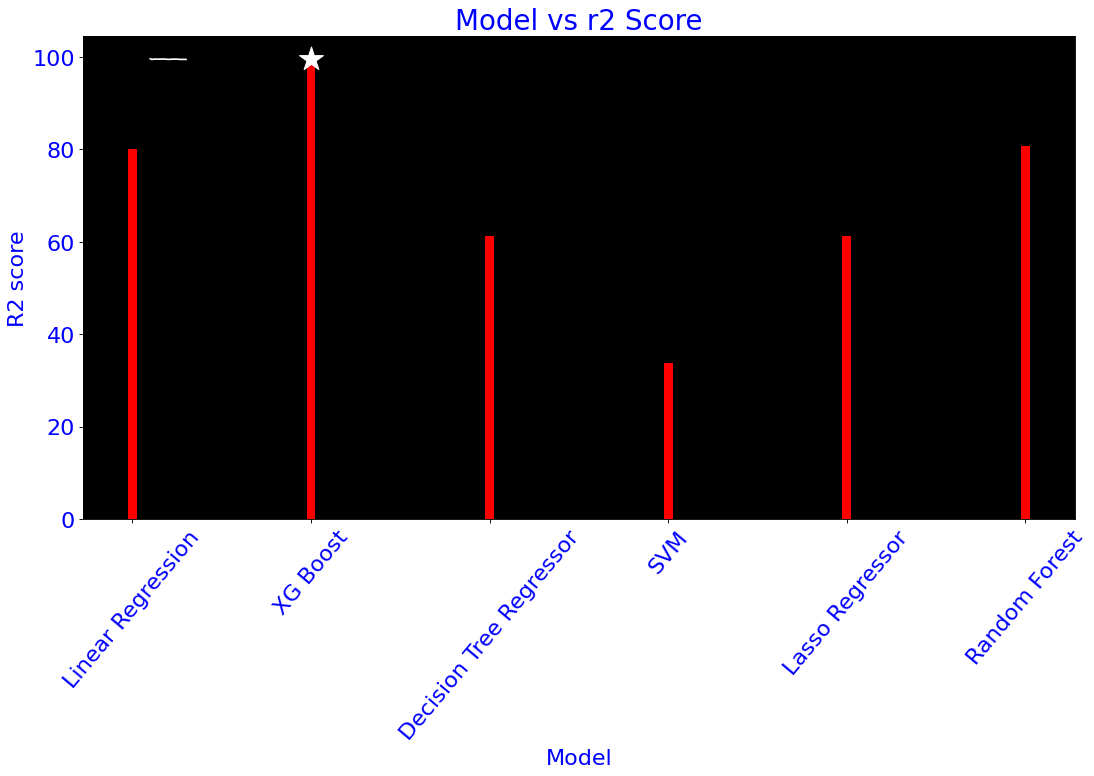

In [118]:
plt.figure(figsize=(16,8),dpi=80)
ax=plt.axes()
ax.set_facecolor('black')
plt.plot(te,re_chart,color='white')
plt.bar(modelname,final_metrics_score,color='red',width=0.05)
plt.scatter(modelname[1],final_metrics_score[1],color='white',s=500,marker='*')
plt.title('Model vs r2 Score',color='blue',fontsize=25)
plt.xlabel('Model',color='blue',fontsize=20)
plt.ylabel('R2 score',color='blue',fontsize=20)
plt.xticks(color='blue',rotation=50,fontsize=20)
plt.yticks(color='blue',fontsize=20)
plt.show()

**From Comparison with all XG Boost gives us the best result so finalizing the XG Boost model as a best model.**

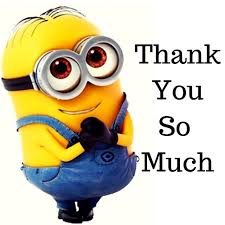

In [119]:
df1.tail(20)

,index,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,Year_difference
7036,7089,chrompet,1202,1.34,2.0,1.0,4,2,0,2,2,2,RH,3.1,3.4,3.5,3.340,86.1034,40
7037,7090,velachery,1941,0.90,3.0,2.0,5,0,1,1,1,1,RH,3.4,4.6,3.7,4.030,94.2026,47
7038,7091,kk nagar,2456,1.71,4.0,2.0,6,1,1,1,2,0,RM,5.0,5.0,3.0,4.200,141.5520,20
7039,7092,anna nagar,1955,0.33,2.0,1.0,5,2,0,1,2,2,RM,3.7,3.4,2.8,3.265,133.0875,30
7040,7093,chrompet,1275,0.03,2.0,1.0,4,0,0,1,1,0,RL,3.9,3.8,4.1,3.920,95.9325,23
7041,7094,anna nagar,1860,1.74,2.0,1.0,5,0,0,2,0,0,RH,4.6,3.4,3.2,3.740,141.1132,6
7042,7095,anna nagar,1611,1.44,1.0,1.0,4,4,1,2,2,2,RM,3.2,3.7,2.9,3.205,139.4478,5
7043,7096,adyar,895,1.97,1.0,1.0,3,1,1,1,2,1,I,3.6,4.7,4.2,4.120,73.7180,40
7044,7097,tnagar,1733,1.91,1.0,1.0,4,0,1,0,2,1,RL,3.4,3.7,2.1,2.890,195.0160,25
7045,7098,karapakkam,666,0.51,1.0,1.0,2,1,1,2,1,0,I,3.2,4.4,2.5,3.280,62.1175,36


In [120]:
df.tail(20)

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,Year_difference,SALES_PRICE
7036,6,1202,1.34,2.0,1.0,4,2,0,2,2,2,3,3.1,3.4,3.5,3.340,40,86.1034
7037,4,1941,0.90,3.0,2.0,5,0,1,1,1,1,3,3.4,4.6,3.7,4.030,47,94.2026
7038,3,2456,1.71,4.0,2.0,6,1,1,1,2,0,5,5.0,5.0,3.0,4.200,20,141.5520
7039,1,1955,0.33,2.0,1.0,5,2,0,1,2,2,5,3.7,3.4,2.8,3.265,30,133.0875
7040,6,1275,0.03,2.0,1.0,4,0,0,1,1,0,4,3.9,3.8,4.1,3.920,23,95.9325
7041,1,1860,1.74,2.0,1.0,5,0,0,2,0,0,3,4.6,3.4,3.2,3.740,6,141.1132
7042,1,1611,1.44,1.0,1.0,4,4,1,2,2,2,5,3.2,3.7,2.9,3.205,5,139.4478
7043,2,895,1.97,1.0,1.0,3,1,1,1,2,1,2,3.6,4.7,4.2,4.120,40,73.7180
7044,0,1733,1.91,1.0,1.0,4,0,1,0,2,1,4,3.4,3.7,2.1,2.890,25,195.0160
7045,5,666,0.51,1.0,1.0,2,1,1,2,1,0,2,3.2,4.4,2.5,3.280,36,62.1175


In [121]:
df1=df1.drop(columns=['index'])

In [122]:
df1.insert(len(df1.columns)-1, 'SALES_PRICE', df1.pop('SALES_PRICE')) #It is used to move the Sales_Price to transfer to last column

In [123]:
df1['AREA'].unique()

array(['karapakkam', 'anna nagar', 'adyar', 'velachery', 'chrompet',
       'kk nagar', 'tnagar'], dtype=object)

In [124]:
total=df[df['AREA']==0]
b=total.shape[0]
MZZONE=total['MZZONE'].mean()
QS_ROOMS=total['QS_ROOMS'].mean()
QS_BATHROOM=total['QS_BATHROOM'].mean()
QS_BEDROOM=total['QS_BEDROOM'].mean()
QS_OVERALL=total['QS_OVERALL'].mean()
Year_difference=total['Year_difference'].mean()
print(MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,Year_difference)

4.036363636363636 3.5484848484848484 3.506464646464646 3.5290909090909093 3.529252525252525 25.151515151515152


In [125]:
total=df[df['AREA']==1]
b=total.shape[0]
MZZONE=total['MZZONE'].mean()
QS_ROOMS=total['QS_ROOMS'].mean()
QS_BATHROOM=total['QS_BATHROOM'].mean()
QS_BEDROOM=total['QS_BEDROOM'].mean()
QS_OVERALL=total['QS_OVERALL'].mean()
Year_difference=total['Year_difference'].mean()
print(MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,Year_difference)

4.003861003861004 3.5411840411840405 3.4791505791505792 3.47039897039897 3.497361647361647 25.245817245817246


In [126]:
total=df[df['AREA']==2]
b=total.shape[0]
MZZONE=total['MZZONE'].mean()
QS_ROOMS=total['QS_ROOMS'].mean()
QS_BATHROOM=total['QS_BATHROOM'].mean()
QS_BEDROOM=total['QS_BEDROOM'].mean()
QS_OVERALL=total['QS_OVERALL'].mean()
Year_difference=total['Year_difference'].mean()
print(MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,Year_difference)

2.388816644993498 3.501950585175553 3.507542262678804 3.4931079323797136 3.4986475942782835 22.671001300390117


In [127]:
total=df[df['AREA']==3]
b=total.shape[0]
MZZONE=total['MZZONE'].mean()
QS_ROOMS=total['QS_ROOMS'].mean()
QS_BATHROOM=total['QS_BATHROOM'].mean()
QS_BEDROOM=total['QS_BEDROOM'].mean()
QS_OVERALL=total['QS_OVERALL'].mean()
Year_difference=total['Year_difference'].mean()
print(MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,Year_difference)

4.013131313131313 3.55040404040404 3.5282828282828285 3.5137373737373743 3.52910101010101 17.316161616161615


In [128]:
total=df[df['AREA']==4]
b=total.shape[0]
MZZONE=total['MZZONE'].mean()
QS_ROOMS=total['QS_ROOMS'].mean()
QS_BATHROOM=total['QS_BATHROOM'].mean()
QS_BEDROOM=total['QS_BEDROOM'].mean()
QS_OVERALL=total['QS_OVERALL'].mean()
Year_difference=total['Year_difference'].mean()
print(MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,Year_difference)

2.486153846153846 3.524923076923077 3.5077948717948724 3.46574358974359 3.5019384615384612 30.31282051282051


In [129]:
total=df[df['AREA']==5]
b=total.shape[0]
MZZONE=total['MZZONE'].mean()
QS_ROOMS=total['QS_ROOMS'].mean()
QS_BATHROOM=total['QS_BATHROOM'].mean()
QS_BEDROOM=total['QS_BEDROOM'].mean()
QS_OVERALL=total['QS_OVERALL'].mean()
Year_difference=total['Year_difference'].mean()
print(MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,Year_difference)

2.426784400294334 3.493156732891832 3.4881530537159673 3.4927888153053717 3.4915084621044885 27.741721854304636


In [130]:
total=df[df['AREA']==6]
b=total.shape[0]
MZZONE=total['MZZONE'].mean()
QS_ROOMS=total['QS_ROOMS'].mean()
QS_BATHROOM=total['QS_BATHROOM'].mean()
QS_BEDROOM=total['QS_BEDROOM'].mean()
QS_OVERALL=total['QS_OVERALL'].mean()
Year_difference=total['Year_difference'].mean()
print(MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,Year_difference)

4.0017740981667655 3.4992903607332937 3.5173270254287403 3.4645180366646953 3.496073329390893 22.102306327616795


In [131]:
import pickle
# open a file, where you ant to store the data
file = open('xgboost.pkl', 'wb')
# dump information to that file
pickle.dump(model1, file)

In [132]:
model1

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [133]:
df.head(10)

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,Year_difference,SALES_PRICE
0,5,1004,1.31,1.0,1.0,3,0,1,0,0,2,0,4.0,3.9,4.9,4.330,44,76.0000
1,1,1986,0.26,2.0,1.0,5,0,0,0,0,0,3,4.9,4.2,2.5,3.765,11,217.1777
2,2,909,0.70,1.0,1.0,3,0,1,0,1,0,4,4.1,3.8,2.2,3.090,20,131.5920
3,4,1855,0.14,3.0,2.0,5,2,0,2,2,2,2,4.7,3.9,3.6,4.010,22,96.3029
4,5,1226,0.84,1.0,1.0,3,0,1,2,0,0,1,3.0,2.5,4.1,3.290,30,74.0625
5,6,1220,0.36,2.0,1.0,4,4,0,0,2,1,3,4.5,2.6,3.1,3.320,5,123.9475
6,6,1167,1.37,1.0,1.0,3,4,0,2,0,1,4,3.6,2.1,2.5,2.670,28,84.8879
7,4,1847,1.76,3.0,2.0,5,2,0,0,0,0,5,2.4,4.5,2.1,3.260,10,168.0025
8,6,771,1.75,1.0,1.0,2,1,0,2,2,2,5,2.9,3.7,4.0,3.550,34,83.0897
9,4,1635,0.74,2.0,1.0,4,0,0,2,1,1,2,3.1,3.1,3.3,3.160,15,80.8365


In [134]:
df1.head(10)

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,Year_difference,SALES_PRICE
0,karapakkam,1004,1.31,1.0,1.0,3,0,1,0,0,2,A,4.0,3.9,4.9,4.330,44,76.0000
1,anna nagar,1986,0.26,2.0,1.0,5,0,0,0,0,0,RH,4.9,4.2,2.5,3.765,11,217.1777
2,adyar,909,0.70,1.0,1.0,3,0,1,0,1,0,RL,4.1,3.8,2.2,3.090,20,131.5920
3,velachery,1855,0.14,3.0,2.0,5,2,0,2,2,2,I,4.7,3.9,3.6,4.010,22,96.3029
4,karapakkam,1226,0.84,1.0,1.0,3,0,1,2,0,0,C,3.0,2.5,4.1,3.290,30,74.0625
5,chrompet,1220,0.36,2.0,1.0,4,4,0,0,2,1,RH,4.5,2.6,3.1,3.320,5,123.9475
6,chrompet,1167,1.37,1.0,1.0,3,4,0,2,0,1,RL,3.6,2.1,2.5,2.670,28,84.8879
7,velachery,1847,1.76,3.0,2.0,5,2,0,0,0,0,RM,2.4,4.5,2.1,3.260,10,168.0025
8,chrompet,771,1.75,1.0,1.0,2,1,0,2,2,2,RM,2.9,3.7,4.0,3.550,34,83.0897
9,velachery,1635,0.74,2.0,1.0,4,0,0,2,1,1,I,3.1,3.1,3.3,3.160,15,80.8365
